# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. 
This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi
operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency,maximise revenue,
and enhance passengerexperience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, 
itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment,
we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and tax applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import the libraries you will be using for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [9]:
# try loading one file

df1 = pd.read_parquet('2023-1.parquet')

df1.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [16]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [18]:
# from google.colab import drive
# drive.mount('/content/drive')

In [20]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir(r'C:\Users\ADMIN\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        print(f"Reading file:", file_path)
        # Reading the current file
        file_data = pd.read_parquet(file_path)
        file_data['date'] = file_data.tpep_pickup_datetime.dt.date
        file_data['hour'] = file_data.tpep_pickup_datetime.dt.hour
        file_data['date'] = pd.to_datetime(file_data['date'])
         # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
         # After completing iteration through each date, we will append this data to the final dataframe.
         # Loop through dates and then loop through every hour of each date
        for date in  file_data[file_data['date'].dt.year == 2023]['date'].unique():
            sampled_data = pd.DataFrame()
             # Iterate through each hour of the selected date
            for hour in range(0,24):
                hourly_data = file_data[(file_data.hour == hour) & (file_data.date == date)]
                #Sample 5% of the hourly data randomly
                sampled_hourly_data = hourly_data.sample(frac=0.0075, random_state=45)
                #add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sampled_hourly_data], axis=0)
            # Concatenate the sampled data of all the dates to a single dataframe
            df = pd.concat([df, sampled_data], axis=0)
        print(df.shape)
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Reading file: C:\Users\ADMIN\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023-1.parquet
(22821, 21)
Reading file: C:\Users\ADMIN\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023-10.parquet
(48955, 22)
Reading file: C:\Users\ADMIN\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023-11.parquet
(73718, 22)
Reading file: C:\Users\ADMIN\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023-12.parquet
(98719, 22)
Reading file: C:\Users\ADMIN\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023-2.parquet
(124036, 22)
Reading file: C:\Users\ADMIN\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023-3.parquet
(148590, 22)
Reading file: C:\Users\ADMIN\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023-4.parquet
(169544, 22)
Reading file: C:\Users\ADMIN\Downloads\Datasets and Dictionary-NYC\Datasets a

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [23]:
# # Store the df in csv/parquet

In [29]:
import os

# Create the directory if it doesn't exist
os.makedirs("Final_Data", exist_ok=True)

# Now save the file
df.to_csv("Final_Data/Final_Sampled_Data.csv")


In [31]:

# Ensure the directory exists
os.makedirs("Datasets and Dictionary/trip_records/Final_Data", exist_ok=True)

# Now save the file
df.to_csv("Datasets and Dictionary/trip_records/Final_Data/Final_Sampled_Data.csv")


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [35]:
# Load the new data file
df = pd.read_csv('Datasets and Dictionary/trip_records/Final_Data/Final_Sampled_Data.csv')

In [37]:
df.head()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0     2995129         2  2023-01-01 00:49:00   2023-01-01 01:09:00   
1        1524         2  2023-01-01 00:32:23   2023-01-01 00:40:58   
2        1582         2  2023-01-01 00:26:09   2023-01-01 00:58:49   
3        2414         1  2023-01-01 00:45:12   2023-01-01 00:53:00   
4        4592         2  2023-01-01 00:07:05   2023-01-01 00:25:24   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              NaN           8.90         NaN                NaN   
1              1.0           0.74         1.0                  N   
2              1.0           4.84         1.0                  N   
3              1.0           1.40         1.0                  N   
4              1.0           3.11         1.0                  N   

   PULocationID  DOLocationID  ...  mta_tax  tip_amount  tolls_amount  \
0           237           261  ...      0.5        8.63           0.0   
1           170           161  ...      0.5        2.72           0.0   
2           263            68  ...      0.5        7.48           0.0   
3           237           170  ...      0.5        0.00           0.0   
4            48           114  ...      0.5        4.68           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         51.77                   NaN          NaN   
1                    1.0         16.32                   2.5          0.0   
2                    1.0         44.88                   2.5          0.0   
3                    1.0         13.60                   2.5          0.0   
4                    1.0         28.08                   2.5          0.0   

         date  hour  Airport_fee  
0  2023-01-01     0          NaN  
1  2023-01-01     0          NaN  
2  2023-01-01     0          NaN  
3  2023-01-01     0          NaN  
4  2023-01-01     0          NaN  

[5 rows x 23 columns]

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284492 entries, 0 to 284491
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             284492 non-null  int64  
 1   VendorID               284492 non-null  int64  
 2   tpep_pickup_datetime   284492 non-null  object 
 3   tpep_dropoff_datetime  284492 non-null  object 
 4   passenger_count        273623 non-null  float64
 5   trip_distance          284492 non-null  float64
 6   RatecodeID             273623 non-null  float64
 7   store_and_fwd_flag     273623 non-null  object 
 8   PULocationID           284492 non-null  int64  
 9   DOLocationID           284492 non-null  int64  
 10  payment_type           284492 non-null  int64  
 11  fare_amount            284492 non-null  float64
 12  extra                  284492 non-null  float64
 13  mta_tax                284492 non-null  float64
 14  tip_amount             284492 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [43]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)

df.drop(columns=['Unnamed: 0'], inplace=True)


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [46]:
# Combine the two airport fee columns
df.airport_fee.fillna(df.Airport_fee, inplace =True)
df.drop(columns=['Airport_fee'], inplace=True)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [49]:
# check where values of fare amount are negative
df.loc[df.fare_amount < 0]

df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:49:00   2023-01-01 01:09:00              NaN   
1         2  2023-01-01 00:32:23   2023-01-01 00:40:58              1.0   
2         2  2023-01-01 00:26:09   2023-01-01 00:58:49              1.0   
3         1  2023-01-01 00:45:12   2023-01-01 00:53:00              1.0   
4         2  2023-01-01 00:07:05   2023-01-01 00:25:24              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           8.90         NaN                NaN           237           261   
1           0.74         1.0                  N           170           161   
2           4.84         1.0                  N           263            68   
3           1.40         1.0                  N           237           170   
4           3.11         1.0                  N            48           114   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             0  ...    0.0      0.5        8.63           0.0   
1             1  ...    1.0      0.5        2.72           0.0   
2             1  ...    1.0      0.5        7.48           0.0   
3             2  ...    3.5      0.5        0.00           0.0   
4             1  ...    1.0      0.5        4.68           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         51.77                   NaN          NaN   
1                    1.0         16.32                   2.5          0.0   
2                    1.0         44.88                   2.5          0.0   
3                    1.0         13.60                   2.5          0.0   
4                    1.0         28.08                   2.5          0.0   

         date hour  
0  2023-01-01    0  
1  2023-01-01    0  
2  2023-01-01    0  
3  2023-01-01    0  
4  2023-01-01    0  

[5 rows x 21 columns]

Did you notice something different in the `RatecodeID` column for above records?

In [52]:
# Analyse RatecodeID for the negative fare amounts
df[df['fare_amount'] < 0 ].RatecodeID.value_counts()

Series([], Name: count, dtype: int64)

In [54]:
# Find which columns have negative values
df_numeric = df.select_dtypes(include = ['number'])

df_negative = df_numeric.apply(lambda col: col<0)

df_negative.any()

VendorID                 False
passenger_count          False
trip_distance            False
RatecodeID               False
PULocationID             False
DOLocationID             False
payment_type             False
fare_amount              False
extra                     True
mta_tax                   True
tip_amount               False
tolls_amount             False
improvement_surcharge     True
total_amount              True
congestion_surcharge      True
airport_fee               True
hour                     False
dtype: bool

In [56]:
# fix these negative values

# updating negative values in extra column as 0 because most of the values are 0 and only 2 value are negative
df.extra.value_counts()
df.extra[df.extra < 0] = 0.00

In [58]:
print(df.mta_tax.value_counts())
print(df.improvement_surcharge.value_counts())
print(df.total_amount.value_counts())
print(df.congestion_surcharge.value_counts())   
print(df.airport_fee.value_counts())

mta_tax
 0.50    281748
 0.00      2716
-0.50        17
 0.80         8
 0.05         3
Name: count, dtype: int64
improvement_surcharge
 1.0    284126
 0.3       214
 0.0       135
-1.0        17
Name: count, dtype: int64
total_amount
16.80    3943
12.60    3570
21.00    3369
15.12    2160
18.00    2140
         ... 
12.69       1
92.15       1
87.37       1
60.81       1
72.89       1
Name: count, Length: 9330, dtype: int64
congestion_surcharge
 2.50    252477
 0.00     21135
-2.50        10
 2.75         1
Name: count, dtype: int64
airport_fee
 0.00    249551
 1.75     18077
 1.25      5992
-1.75         2
-1.25         1
Name: count, dtype: int64


In [60]:
df.mta_tax[df.mta_tax < 0] = 0.00
df.improvement_surcharge[df.improvement_surcharge < 0] = 0.00
df.total_amount[df.total_amount < 0] = 0.00
df.congestion_surcharge[df.congestion_surcharge < 0] = 0.00
df.airport_fee[df.airport_fee < 0] = 0.00

In [62]:
df.select_dtypes(include = ['number']).apply(lambda col: col<0).any()

VendorID                 False
passenger_count          False
trip_distance            False
RatecodeID               False
PULocationID             False
DOLocationID             False
payment_type             False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
congestion_surcharge     False
airport_fee              False
hour                     False
dtype: bool

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column

In [66]:
# Find the proportion of missing values in each column
df.isnull().mean()

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.038205
trip_distance            0.000000
RatecodeID               0.038205
store_and_fwd_flag       0.038205
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.038205
airport_fee              0.038205
date                     0.000000
hour                     0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [69]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'

df[df['passenger_count'].isnull()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2023-01-01 00:49:00   2023-01-01 01:09:00              NaN   
40             2  2023-01-01 01:44:41   2023-01-01 01:58:24              NaN   
49             2  2023-01-01 01:14:04   2023-01-01 01:24:41              NaN   
53             2  2023-01-01 01:34:39   2023-01-01 01:41:17              NaN   
65             2  2023-01-01 01:58:00   2023-01-01 02:33:00              NaN   
...          ...                  ...                   ...              ...   
284458         1  2023-09-30 23:13:07   2023-09-30 23:28:44              NaN   
284467         1  2023-09-30 23:26:33   2023-09-30 23:51:06              NaN   
284471         1  2023-09-30 23:14:34   2023-09-30 23:29:06              NaN   
284487         1  2023-09-30 23:06:26   2023-09-30 23:24:40              NaN   
284491         1  2023-09-30 23:15:11   2023-09-30 23:54:33              NaN   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                8.90         NaN                NaN           237   
40               3.74         NaN                NaN           255   
49               1.89         NaN                NaN            41   
53               0.77         NaN                NaN           143   
65              11.89         NaN                NaN           142   
...               ...         ...                ...           ...   
284458           0.00         NaN                NaN            79   
284467           0.00         NaN                NaN           163   
284471           0.00         NaN                NaN           241   
284487           0.00         NaN                NaN            87   
284491           0.00         NaN                NaN           241   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
0                261             0  ...    0.0      0.5        8.63   
40                66             0  ...    0.0      0.5        4.32   
49               238             0  ...    0.0      0.5        3.63   
53               142             0  ...    0.0      0.5        3.36   
65               228             0  ...    0.0      0.5       10.32   
...              ...           ...  ...    ...      ...         ...   
284458           140             0  ...    0.0      0.5        0.00   
284467           144             0  ...    0.0      0.5        0.00   
284471           243             0  ...    0.0      0.5        0.00   
284487           186             0  ...    0.0      0.5        0.00   
284491           232             0  ...    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
0               0.00                    1.0         51.77   
40              0.00                    1.0         25.90   
49              0.00                    1.0         21.77   
53              0.00                    1.0         20.16   
65              6.55                    1.0         61.92   
...              ...                    ...           ...   
284458          0.00                    1.0         21.36   
284467          0.00                    1.0         35.46   
284471          0.00                    1.0         15.22   
284487          0.00                    1.0         29.80   
284491          0.00                    1.0         51.29   

        congestion_surcharge  airport_fee        date hour  
0                        NaN          NaN  2023-01-01    0  
40                       NaN          NaN  2023-01-01    1  
49                       NaN          NaN  2023-01-01    1  
53                       NaN          NaN  2023-01-01    1  
65                       NaN          NaN  2023-01-01    1  
...                      ...          ...         ...  ...  
284458                   NaN          NaN  2023-09-30   23  
284467                   NaN          NaN  2023-09-30   23  
284471                   NaN          NaN  2023-09-30   23  
284487    

In [71]:
df.passenger_count.median()

df.passenger_count.fillna(df.passenger_count.median(), inplace = True)

In [73]:
(df[df.passenger_count == 0].shape[0] *100)/df.shape[0]

1.5047874808430466

Did you find zeroes in passenger_count? Handle these.

In [76]:
df.passenger_count[df.passenger_count == 0] = df.passenger_count.median()

In [78]:
(df[df.passenger_count == 0].shape[0] *100)/df.shape[0]

0.0

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [81]:
# Fix missing values in 'RatecodeID'
df.RatecodeID.isnull().sum()/df.shape[0]

df.RatecodeID.fillna(df.RatecodeID.mode()[0], inplace = True)

In [83]:
df.RatecodeID.isnull().sum()/df.shape[0]

0.0

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [86]:
# handle null values in congestion_surcharge

df.congestion_surcharge.isna().sum()/df.shape[0]

df.congestion_surcharge.fillna(df.congestion_surcharge.median(), inplace = True)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [89]:
# Handle any remaining missing values
df.isnull().sum()


VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
store_and_fwd_flag       10869
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
airport_fee              10869
date                         0
hour                         0
dtype: int64

In [91]:
df.store_and_fwd_flag.value_counts()

store_and_fwd_flag
N    271918
Y      1705
Name: count, dtype: int64

In [93]:
df.store_and_fwd_flag.mode()[0]

'N'

In [95]:
df.store_and_fwd_flag.fillna(df.store_and_fwd_flag.mode()[0], inplace = True)

In [97]:
df.store_and_fwd_flag.value_counts()

store_and_fwd_flag
N    282787
Y      1705
Name: count, dtype: int64

In [99]:
df.airport_fee.fillna(0.00, inplace = True)

In [101]:
df.isnull().sum().sum()

0

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [105]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()

VendorID  passenger_count  trip_distance     RatecodeID  \
count  284492.000000    284492.000000  284492.000000  284492.000000   
mean        1.737332         1.374921       5.948573       1.623508   
std         0.446586         0.870075     794.616380       7.329064   
min         1.000000         1.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.050000       1.000000   
50%         2.000000         1.000000       1.800000       1.000000   
75%         2.000000         1.000000       3.410000       1.000000   
max         6.000000         8.000000  345729.440000      99.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  284492.000000  284492.000000  284492.000000  284492.000000   
mean      165.404978     164.187246       1.157692      19.897333   
std        64.033730      69.876248       0.509716      18.441739   
min         1.000000       1.000000       0.000000       0.000000   
25%       132.000000     114.000000       1.000000       9.300000   
50%       162.000000     162.000000       1.000000      13.500000   
75%       234.000000     234.000000       1.000000      22.600000   
max       265.000000     265.000000       4.000000     872.990000   

               extra        mta_tax     tip_amount   tolls_amount  \
count  284492.000000  284492.000000  284492.000000  284492.000000   
mean        1.567686       0.495200       3.551793       0.599879   
std         1.817321       0.048819       4.072001       2.193414   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.500000       1.000000       0.000000   
50%         1.000000       0.500000       2.850000       0.000000   
75%         2.500000       0.500000       4.420000       0.000000   
max        13.750000       0.800000     220.000000      73.780000   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          284492.000000  284492.000000         284492.000000   
mean                0.998939      28.960752              2.314187   
std                 0.030029      23.009306              0.655751   
min                 0.000000       0.000000              0.000000   
25%                 1.000000      15.960000              2.500000   
50%                 1.000000      21.060000              2.500000   
75%                 1.000000      31.000000              2.500000   
max                 1.000000     873.990000              2.750000   

         airport_fee           hour  
count  284492.000000  284492.000000  
mean        0.137525      14.264675  
std         0.456719       5.807753  
min         0.000000       0.000000  
25%         0.000000      11.000000  
50%         0.000000      15.000000  
75%         0.000000      19.000000  
max         1.750000      23.000000

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [120]:
# remove passenger_count > 6
df.passenger_count.value_counts()
df = df[df.passenger_count <= 6]

In [122]:
q = df.trip_distance.quantile([0.99,0.95,0.75,0.25])

q1 =  df.trip_distance.quantile(0.25)
q3 =  df.trip_distance.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

print(q, lower_bound, upper_bound)

0.99    20.24
0.95    15.51
0.75     3.41
0.25     1.05
Name: trip_distance, dtype: float64 -2.49 6.950000000000001


In [124]:
# Continue with outlier handling
df[df.trip_distance <= 250.00]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2023-01-01 00:49:00   2023-01-01 01:09:00              1.0   
1              2  2023-01-01 00:32:23   2023-01-01 00:40:58              1.0   
2              2  2023-01-01 00:26:09   2023-01-01 00:58:49              1.0   
3              1  2023-01-01 00:45:12   2023-01-01 00:53:00              1.0   
4              2  2023-01-01 00:07:05   2023-01-01 00:25:24              1.0   
...          ...                  ...                   ...              ...   
284487         1  2023-09-30 23:06:26   2023-09-30 23:24:40              1.0   
284488         2  2023-09-30 23:20:33   2023-09-30 23:31:22              2.0   
284489         2  2023-09-30 23:10:06   2023-09-30 23:21:52              1.0   
284490         2  2023-09-30 23:48:25   2023-10-01 00:00:42              3.0   
284491         1  2023-09-30 23:15:11   2023-09-30 23:54:33              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                8.90         1.0                  N           237   
1                0.74         1.0                  N           170   
2                4.84         1.0                  N           263   
3                1.40         1.0                  N           237   
4                3.11         1.0                  N            48   
...               ...         ...                ...           ...   
284487           0.00         1.0                  N            87   
284488           1.98         1.0                  N           107   
284489           3.25         1.0                  N            87   
284490           2.19         1.0                  N           158   
284491           0.00         1.0                  N           241   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
0                261             0  ...    0.0      0.5        8.63   
1                161             1  ...    1.0      0.5        2.72   
2                 68             1  ...    1.0      0.5        7.48   
3                170             2  ...    3.5      0.5        0.00   
4                114             1  ...    1.0      0.5        4.68   
...              ...           ...  ...    ...      ...         ...   
284487           186             0  ...    0.0      0.5        0.00   
284488           161             1  ...    1.0      0.5        3.56   
284489            25             1  ...    1.0      0.5        4.26   
284490           186             1  ...    1.0      0.5        2.00   
284491           232             0  ...    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
0                0.0                    1.0         51.77   
1                0.0                    1.0         16.32   
2                0.0                    1.0         44.88   
3                0.0                    1.0         13.60   
4                0.0                    1.0         28.08   
...              ...                    ...           ...   
284487           0.0                    1.0         29.80   
284488           0.0                    1.0         21.36   
284489           0.0                    1.0         25.56   
284490           0.0                    1.0         21.20   
284491           0.0                    1.0         51.29   

        congestion_surcharge  airport_fee        date hour  
0                        2.5          0.0  2023-01-01    0  
1                        2.5          0.0  2023-01-01    0  
2                        2.5          0.0  2023-01-01    0  
3                        2.5          0.0  2023-01-01    0  
4                        2.5          0.0  2023-01-01    0  
...                      ...          ...         ...  ...  
284487                   2.5          0.0  2023-09-30   23  
284488                   2.5          0.0  2023-09-30   23  
284489                   2.5          0.0  2023-09-30   23  
284490    

In [126]:
df = df[df.trip_distance < 250.00]

In [128]:
df.drop(df[(df.fare_amount > 100) & (df.trip_distance ==0)].index, inplace = True)  

In [130]:
df.drop(df[(df.fare_amount == 0) & (df.trip_distance == 0) &(df.PULocationID != df.DOLocationID)].index, inplace = True)

In [132]:
df.payment_type.replace(0,1, inplace = True)
df.payment_type.value_counts()

payment_type
1    233914
2     47190
4      1947
3      1325
Name: count, dtype: int64

In [134]:
# Do any columns need standardising?
#few columns needs standardization 
#Trip-Related Columns (May Need Standardization)
#trip_distance (measured in miles, but can vary greatly)
#fare_amount (in dollars, but highly skewed)
#total_amount (sum of multiple charges, needs uniformity)

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [139]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'date',
 'hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [145]:
##Categorical Variable
#VendorID
#RatecodeID
#payment_type
#PULocationID
#DOLocationID

Category_cols = ['VendorID', 'RatecodeID', 'payment_type', 'PULocationID', 'DOLocationID']  #Categorical Variables

##Datetime Variables
#tpep_pickup_datetime
#tpep_dropoff_datetime

datetime_cols = ['tpep_pickup_datetime', 'tpep_dropoff_datetime','date']  #Datetime

#Numerical Valiables
#fare_amount
#extra
#mta_tax
#tip_amount
#tolls_amount
#improvement_surcharge
#total_amount
#congestion_surcharge
#airport_fee
#trip_distance
#passenger_count
#hour
#trip_duration

Numeric_cols = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee', 'trip_distance', 'passenger_count', 'hour', 'trip_duration']  #Numerical Variables

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

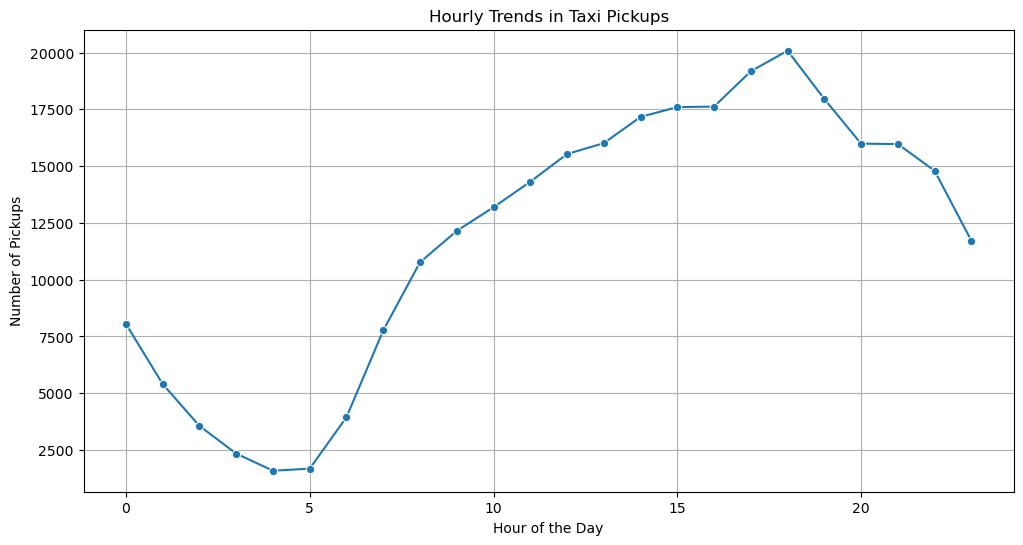

In [149]:
# Find and show the hourly trends in taxi pickups
# Group by hour and count the number of pickups
hourly_pickups = df.groupby('hour').size()
hourly_pickups

# Ploting the hourly trends
plt.figure(figsize=(12,6))
sns.lineplot(x=hourly_pickups.index, y=hourly_pickups.values, marker='o')
plt.title('Hourly Trends in Taxi Pickups')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.grid()
plt.show()

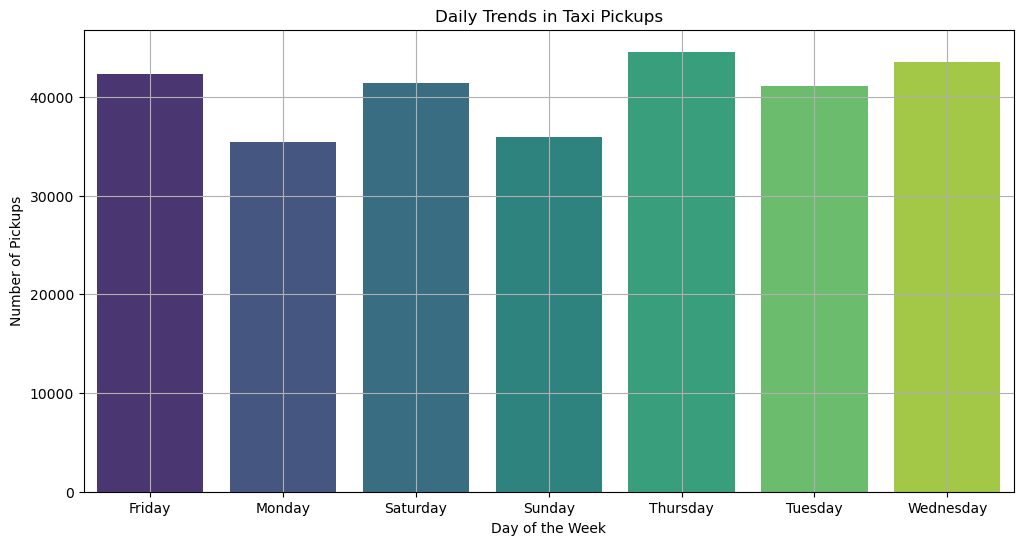

In [151]:
# Find and show the daily trends in taxi pickups (days of the week)
# get day of the week from date column

df.date = pd.to_datetime(df.date)
df['day_of_week'] = df['date'].dt.day_name()

# Group by day of the week and count the number of pickups
daily_pickups = df.groupby('day_of_week').size()
daily_pickups

plt.figure(figsize = (12,6))
sns.barplot(x= daily_pickups.index, y = daily_pickups.values, palette = 'viridis')
plt.title('Daily Trends in Taxi Pickups')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.grid()
plt.show()


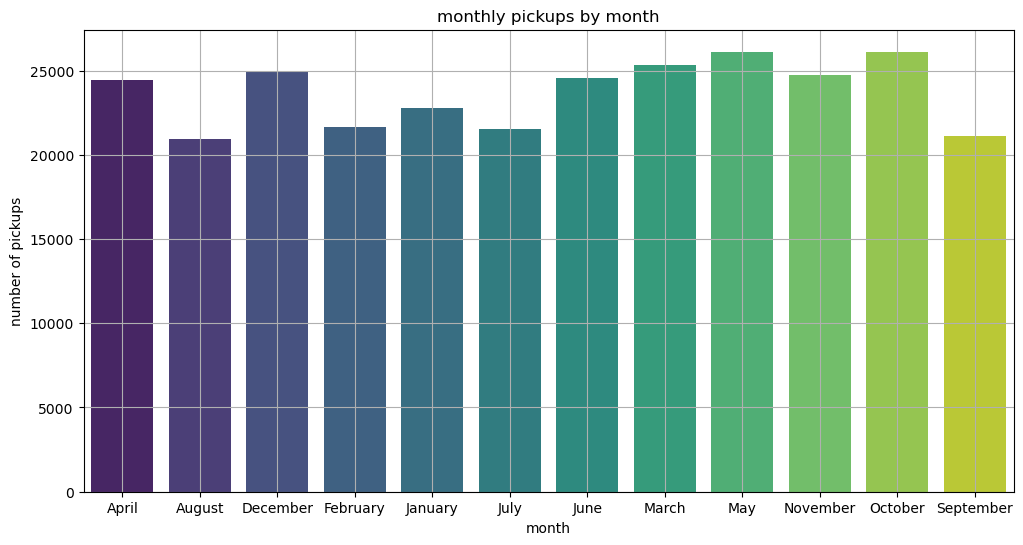

In [159]:
# Show the monthly trends in pickups

#calculate the month for each date
df['month'] = df.date.dt.month_name()

monthly_pickups = df.groupby('month').size()
monthly_pickups
# Plot the monthly trends
plt.figure(figsize = (12,6))
sns.barplot(x= monthly_pickups.index, y = monthly_pickups.values, palette = 'viridis')
plt.title('monthly pickups by month')
plt.xlabel('month')
plt.ylabel('number of pickups')
plt.grid()
plt.show()

##### Financial Analysi

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [163]:
# Analyse the above parameters

# Check for zero and negative values in financial parameters and trip_distance
financial_columns = ["fare_amount", "tip_amount", "total_amount", "trip_distance"]

# Count of zero and negative values in each column
zero_negative_counts = {col: {"zero_count": (df[col] == 0).sum(), "negative_count": (df[col] < 0).sum()} for col in financial_columns}

# Convert to DataFrame for better visualization
zero_negative_df = pd.DataFrame(zero_negative_counts)
zero_negative_df

fare_amount  tip_amount  total_amount  trip_distance
zero_count               70       65261            45           5685
negative_count            0           0             0              0

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [167]:
df_copy = df.copy()

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284376 entries, 0 to 284491
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               284376 non-null  int64         
 1   tpep_pickup_datetime   284376 non-null  object        
 2   tpep_dropoff_datetime  284376 non-null  object        
 3   passenger_count        284376 non-null  float64       
 4   trip_distance          284376 non-null  float64       
 5   RatecodeID             284376 non-null  float64       
 6   store_and_fwd_flag     284376 non-null  object        
 7   PULocationID           284376 non-null  int64         
 8   DOLocationID           284376 non-null  int64         
 9   payment_type           284376 non-null  int64         
 10  fare_amount            284376 non-null  float64       
 11  extra                  284376 non-null  float64       
 12  mta_tax                284376 non-null  float64  

In [201]:

# Remove rows with zero where pickup location is not equal to drop location
df_non_zeros = df[(df["fare_amount"] > 0) & 
                 ((df["trip_distance"] > 0) &(df.PULocationID != df.DOLocationID))& 
                 (df["total_amount"] > 0) & 
                 (df["tip_amount"] >= 0)].copy()

In [203]:
df_non_zeros.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265949 entries, 0 to 284490
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               265949 non-null  int64         
 1   tpep_pickup_datetime   265949 non-null  object        
 2   tpep_dropoff_datetime  265949 non-null  object        
 3   passenger_count        265949 non-null  float64       
 4   trip_distance          265949 non-null  float64       
 5   RatecodeID             265949 non-null  float64       
 6   store_and_fwd_flag     265949 non-null  object        
 7   PULocationID           265949 non-null  int64         
 8   DOLocationID           265949 non-null  int64         
 9   payment_type           265949 non-null  int64         
 10  fare_amount            265949 non-null  float64       
 11  extra                  265949 non-null  float64       
 12  mta_tax                265949 non-null  float64  

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

TypeError: 'str' object is not callable

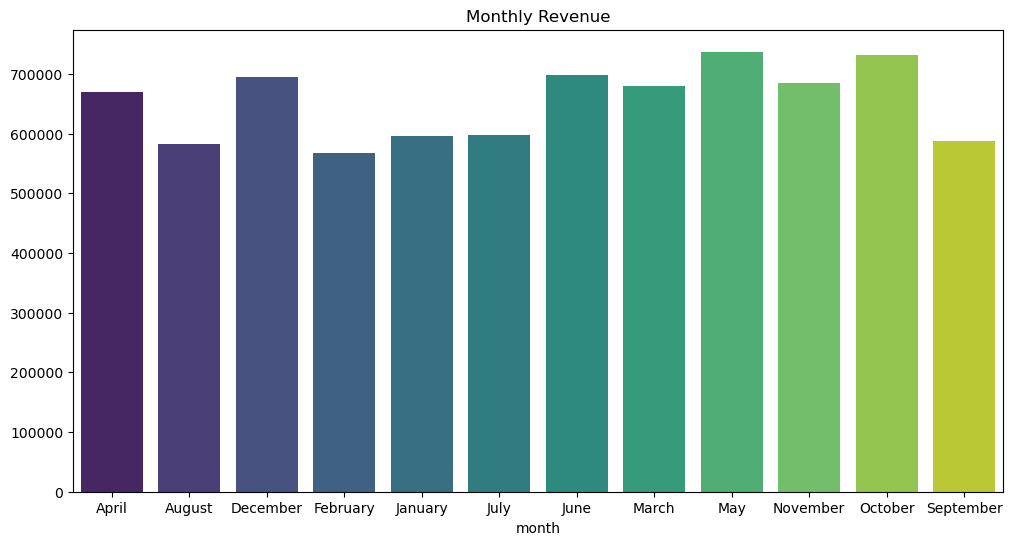

In [207]:
# Group data by month and analyze monthly revenue
monthly_revenue = df_non_zeros.groupby('month')['total_amount'].sum()

# Plot the monthly revenue
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette='viridis')

# Corrected function calls for axis labels
plt.title('Monthly Revenue')
plt.xlabel('Month')  # Corrected
plt.ylabel('Total Amount')  # Corrected
plt.grid()
plt.show()


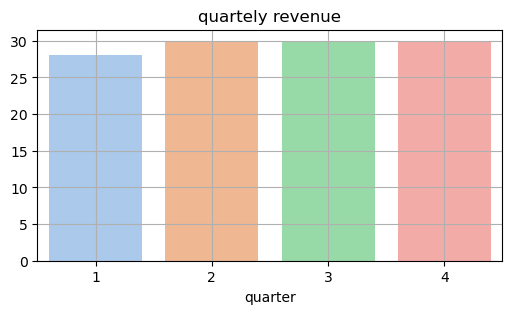

In [209]:
# Calculate proportion of each quarter

# calculate the quarter for each date
df_non_zeros['quarter'] = df_non_zeros['date'].dt.quarter

quarterly_revenue = df_non_zeros.groupby('quarter')['total_amount'].mean()
quarterly_revenue

# Plot the quarterly revenue
plt.figure(figsize = (6,3))
sns.barplot(x = quarterly_revenue.index, y = quarterly_revenue.values, palette = 'pastel')
plt.title('quartely revenue')
plt.xlabel = ('quarter')
plt.ylabel = ('total amount')
plt.grid()
plt.show()



In [211]:
total_yearly_revenue = df_non_zeros['total_amount'].sum()

quarterly_revenue_proportion = (quarterly_revenue / total_yearly_revenue) * 100

# Display the proportion of each quarter
print(quarterly_revenue_proportion)

quarter
1    0.000358
2    0.000381
3    0.000381
4    0.000383
Name: total_amount, dtype: float64


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

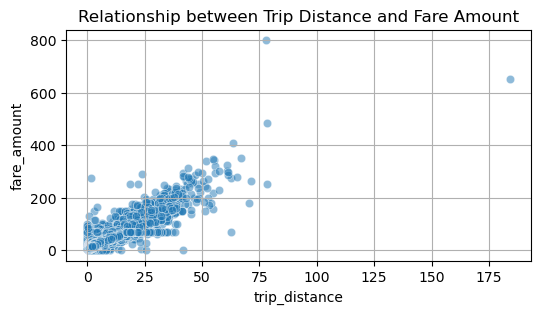

Correlation between Trip Distance and Fare Amount: 0.9524362524076171


In [214]:
# Show how trip fare is affected by distance

# Plot the relationship between trip_distance and fare_amount
plt.figure(figsize=(6, 3))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df_non_zeros, alpha=0.5)
plt.title('Relationship between Trip Distance and Fare Amount')
plt.grid()
plt.show()

# Calculate the correlation value
correlation = df_non_zeros['trip_distance'].corr(df_non_zeros['fare_amount'])
print(f'Correlation between Trip Distance and Fare Amount: {correlation}')


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

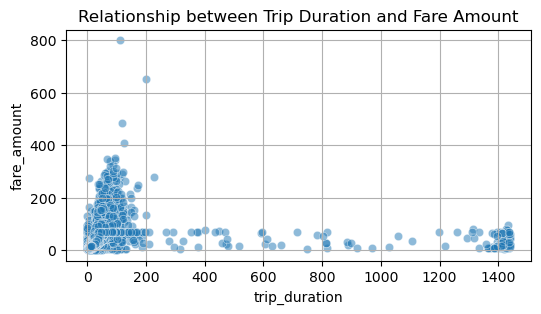

Correlation between Trip Distance and Fare Amount: 0.30104121832968445


In [219]:
# Show relationship between fare and trip duration

#converting the object type columns to datetime and getting difference as trip duration

df_non_zeros['tpep_pickup_datetime'] = pd.to_datetime(df_non_zeros['tpep_pickup_datetime'])
df_non_zeros['tpep_dropoff_datetime'] = pd.to_datetime(df_non_zeros['tpep_dropoff_datetime'])
# Calculate the trip duration in minutes
trip_duration = df_non_zeros['tpep_pickup_datetime'] - df_non_zeros['tpep_dropoff_datetime']
df_non_zeros['trip_duration'] = trip_duration.dt.total_seconds()/60


df_non_zeros['trip_duration'] = df_non_zeros['trip_duration'].abs()

plt.figure(figsize=(6, 3))
sns.scatterplot(x='trip_duration', y='fare_amount', data=df_non_zeros, alpha=0.5)
plt.title('Relationship between Trip Duration and Fare Amount')
plt.grid()
plt.show()

# Calculate the correlation value
correlation = df_non_zeros['trip_duration'].corr(df_non_zeros['fare_amount'])
print(f'Correlation between Trip Distance and Fare Amount: {correlation}')

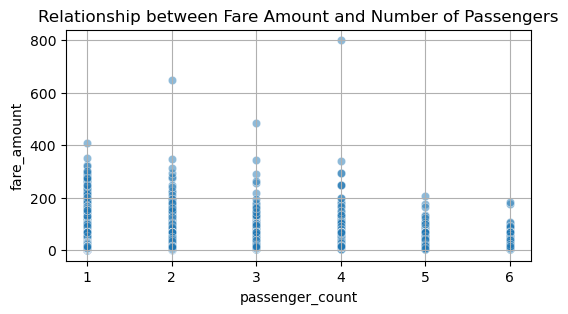

Correlation between Fare Amount and Number of Passengers: 0.04063080288499953


In [221]:
# Show relationship between fare and number of passengers

plt.figure(figsize = (6,3))
sns.scatterplot(x = 'passenger_count', y = 'fare_amount', data = df_non_zeros, alpha = 0.5)
plt.title('Relationship between Fare Amount and Number of Passengers')
plt.grid()
plt.show()

correlation = df_non_zeros['passenger_count'].corr(df_non_zeros['fare_amount'])
print(f'Correlation between Fare Amount and Number of Passengers: {correlation}')

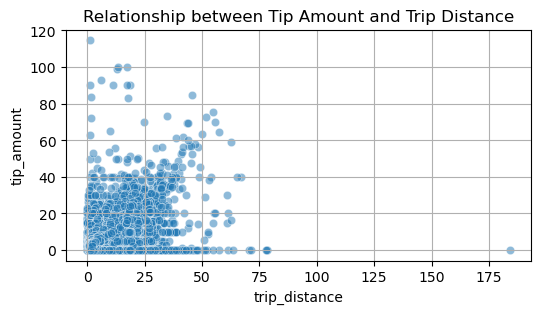

Correlation between Trip distance and tip amount: 0.5967033673219475


In [223]:
# Show relationship between tip and trip distance
plt.figure(figsize =(6,3))
sns.scatterplot(x ='trip_distance', y = 'tip_amount', data = df_non_zeros, alpha = 0.5)
plt.title('Relationship between Tip Amount and Trip Distance')
plt.grid()
plt.show()

correlation  = df_non_zeros['trip_distance'].corr(df_non_zeros['tip_amount'])
print(f'Correlation between Trip distance and tip amount: {correlation}')

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

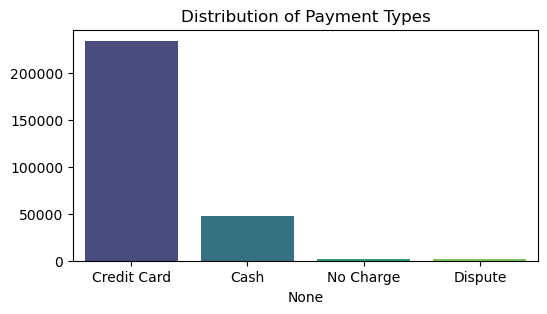

Credit Card    82.255183
Cash           16.594227
No Charge       0.684657
Dispute         0.465932
Name: count, dtype: float64


In [226]:
# Analyse the distribution of different payment types (payment_type).
payment_counts = df["payment_type"].value_counts()

#rename the index of series
payment_counts.index = ['Credit Card', 'Cash', 'No Charge', 'Dispute']
# Plot bar chart
plt.figure(figsize=(6,3))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="viridis")
plt.title("Distribution of Payment Types")
plt.show()


# Print percentage distribution
payment_percentage = (payment_counts / payment_counts.sum()) * 100
print(payment_percentage)


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute


##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [234]:
#pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [247]:
!pip install geopandas


   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
    --------------------------------------- 0.3/16.2 MB ? eta -:--:--
    --------------------------------------- 0.3/16.2 MB ? eta -:--:--
   - -------------------------------------- 0.8/16.2 MB 1.3 MB/s eta 0:00:12
   -- ------------------------------------- 1.0/16.2 MB 1.4 MB/s eta 0:00:12
   --- ------------------------------------ 1.3/16.2 MB 1.4 MB/s eta 0:00:11
   --- ------------------------------------ 1.6/16.2 MB 1.3 MB/s eta 0:00:12
   --- ------------------------------------ 1.6/16.2 MB 1.3 MB/s eta 0:00:12
   ----- ---------------------------------- 2.1/16.2 MB 1.2 MB/s eta 0:00:12
   ----- ---------------------------------- 2.4/16.2 MB 1.2 MB/s eta 0:00:12
   ----- ---------------------------------- 2.4/16.2 MB 1.2 MB/s eta 0:00:12
   ------ --------------------------------- 2.6/16.2 MB 1.2 MB/s eta 0:00:12
   ------- -------------------------------- 2.9/16.2 MB 1.1 MB/s eta 0:00:13
   ------- ---------

In [249]:
import os
#os.chdir('..')
os.getcwd()

'C:\\Users\\ADMIN\\Downloads\\Datasets and Dictionary-NYC\\Datasets and Dictionary\\trip_records'

In [255]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file(r'C:\Users\ADMIN\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_zones')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

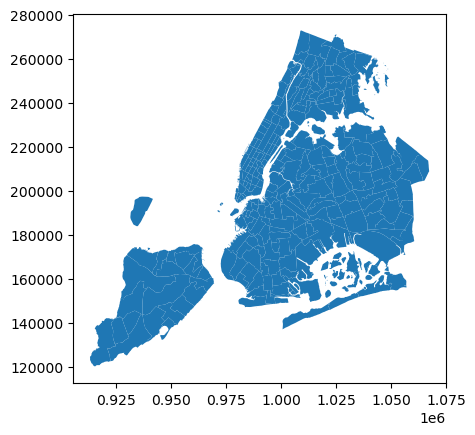

In [258]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.

**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [262]:
# Merge zones and trip records using locationID and PULocationID
df_non_zeros = df_non_zeros.merge(zones, left_on = 'PULocationID', right_on = 'LocationID', how = 'left')
df_non_zeros.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:49:00   2023-01-01 01:09:00              1.0   
1         2  2023-01-01 00:32:23   2023-01-01 00:40:58              1.0   
2         2  2023-01-01 00:26:09   2023-01-01 00:58:49              1.0   
3         1  2023-01-01 00:45:12   2023-01-01 00:53:00              1.0   
4         2  2023-01-01 00:07:05   2023-01-01 00:25:24              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           8.90         1.0                  N           237           261   
1           0.74         1.0                  N           170           161   
2           4.84         1.0                  N           263            68   
3           1.40         1.0                  N           237           170   
4           3.11         1.0                  N            48           114   

   payment_type  ...    month  quarter  trip_duration  OBJECTID  Shape_Leng  \
0             1  ...  January        1      20.000000     237.0    0.042213   
1             1  ...  January        1       8.583333     170.0    0.045769   
2             1  ...  January        1      32.666667     263.0    0.037017   
3             2  ...  January        1       7.800000     237.0    0.042213   
4             1  ...  January        1      18.316667      48.0    0.043747   

   Shape_Area                   zone  LocationID    borough  \
0    0.000096  Upper East Side South       237.0  Manhattan   
1    0.000074            Murray Hill       170.0  Manhattan   
2    0.000066         Yorkville West       263.0  Manhattan   
3    0.000096  Upper East Side South       237.0  Manhattan   
4    0.000094           Clinton East        48.0  Manhattan   

                                            geometry  
0  POLYGON ((993633.442 216961.016, 993507.232 21...  
1  POLYGON ((991999.299 210994.739, 991972.635 21...  
2  POLYGON ((997493.323 220912.386, 997355.264 22...  
3  POLYGON ((993633.442 216961.016, 993507.232 21...  
4  POLYGON ((986694.313 214463.846, 986568.184 21...  

[5 rows x 32 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [265]:
df_non_zeros.LocationID.value_counts()

LocationID
132.0    14021
161.0    12461
237.0    11912
236.0    10582
186.0     9615
         ...  
30.0         1
73.0         1
128.0        1
101.0        1
206.0        1
Name: count, Length: 234, dtype: int64

In [267]:
# Group data by location and calculate the number of trips
location_trips = df_non_zeros.groupby('LocationID').size()
location_trips = location_trips.reset_index(name='Number of Trips')
location_trips.head()

LocationID  Number of Trips
0         1.0                3
1         3.0                2
2         4.0              330
3         5.0                3
4         7.0              133

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [270]:
# Merge trip counts back to the zones GeoDataFrame

zones = zones.merge(location_trips, on='LocationID', how = 'left')
zones.head()


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   Number of Trips  
0              3.0  
1              NaN  
2              2.0  
3            330.0  
4              3.0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)


After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

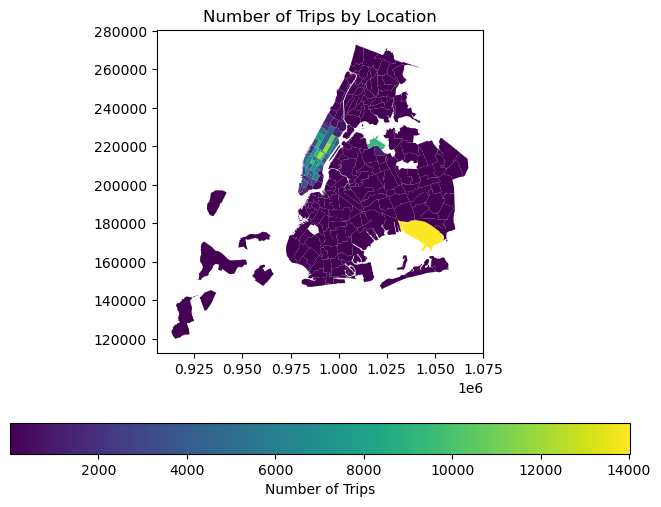

In [275]:
# Define figure and axis
fig, ax = plt.subplots(1,1, figsize = (8,6))

# Plot the map and display it
#zones.plot(column = 'Number of Trips', ax = ax, legend = True, legend_kwds = {'label': 'Number of Trips', 'orientation': 'horizontal'})
zones.plot(column = 'Number of Trips', ax = ax, legend = True, legend_kwds = {'label': 'Number of Trips', 'orientation': 'horizontal'})
plt.title('Number of Trips by Location')
plt.show()


In [277]:
# can you try displaying the zones DF sorted by the number of trips?
zones.sort_values(by ='Number of Trips', ascending = True, inplace = True)
zones.head()

OBJECTID  Shape_Leng  Shape_Area                       zone  LocationID  \
205       206    0.212757    0.000944  Saint George/New Brighton         206   
29         30    0.094510    0.000146              Broad Channel          30   
7           8    0.027591    0.000027               Astoria Park           8   
127       128    0.070209    0.000207           Inwood Hill Park         128   
239       240    0.146070    0.000722         Van Cortlandt Park         240   

           borough                                           geometry  \
205  Staten Island  POLYGON ((961436.305 175473.03, 961460.942 175...   
29          Queens  POLYGON ((1034013.272 163473.152, 1034866.459 ...   
7           Queens  POLYGON ((1005482.276 221686.466, 1005304.898 ...   
127      Manhattan  MULTIPOLYGON (((1005378.119 259493.528, 100537...   
239          Bronx  POLYGON ((1018410.344 266056.29, 1018222.428 2...   

     Number of Trips  
205              1.0  
29               1.0  
7                1.0  
127              1.0  
239              1.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


In [282]:
df_non_zeros.groupby('month').size()

month
April        22971
August       19592
December     23391
February     20398
January      21456
July         20297
June         23061
March        23841
May          24656
November     22865
October      24090
September    19338
dtype: int64

<Figure size 1200x600 with 0 Axes>

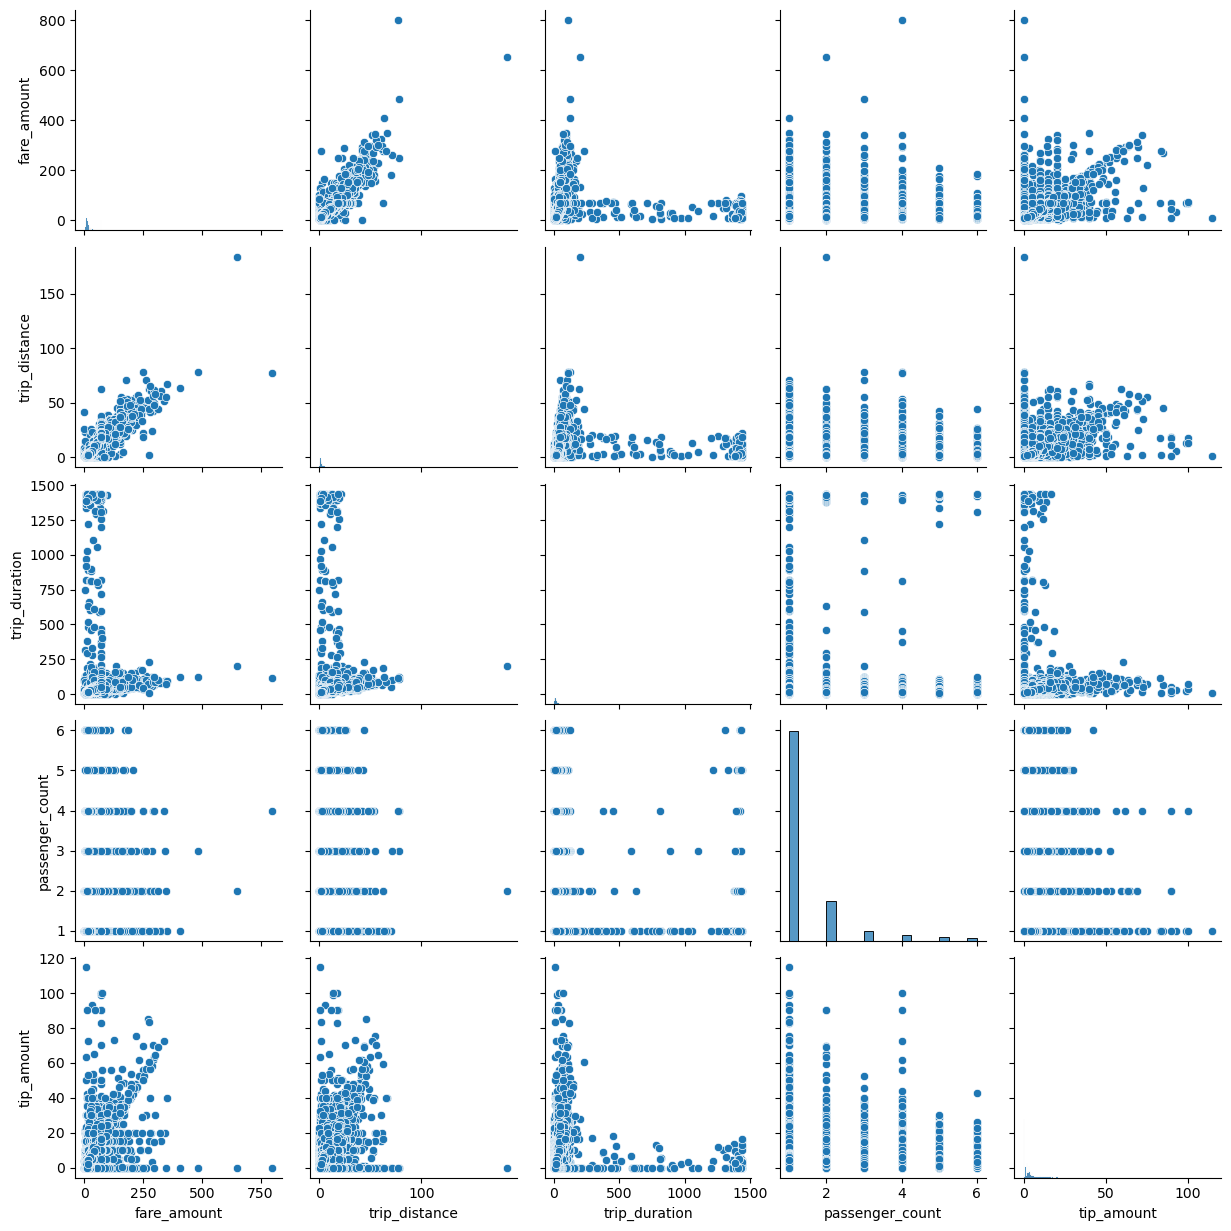

In [284]:
#how fair depends on trip distance, trip duration and passenger counts
# Creating a pairplot to show the relationships between these variables
plt.figure(figsize=(12, 6))
sns.pairplot(df_non_zeros[['fare_amount', 'trip_distance', 'trip_duration', 'passenger_count','tip_amount']])
plt.show()

In [288]:

# Busiest Hour : 15, 16, 17, 18, 19
# Busiest Day : Thursday, Friday, Wednesday
# Busiest Month : May, October, March, December
# Busiest Quarter : 4th
# Highest revenue in quarter : 4
# Highest revenue in month : December
# Highest revenue in day : Thursday
# Highest revenue in hour : 18
# Highest revenue in location : 237
# Highest revenue in payment type : Credit Card
# Highest revenue in RatecodeID : 1
# as trip distance increases fare amount increases
# as trip duration increases fare amount increases
# as fair amount increases trip distance increases
# as trip distance increases tip amount increases
# as trip duration increases tip amount increases

#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [296]:
# Find routes which have the slowest speeds at different times of the day
# Calculating the speed of each trip
df_non_zeros['speed'] = df_non_zeros['trip_distance'] / (df_non_zeros['trip_duration'])


In [298]:
df_non_zeros.groupby('hour')['speed'].mean().sort_values(ascending = True)

hour
17    0.163134
16    0.166207
12    0.168715
11    0.171131
15    0.175330
18    0.177223
13    0.179512
14    0.179882
10    0.180048
9     0.188363
19    0.190154
8     0.192044
20    0.205663
21    0.219292
7     0.242525
0     0.247484
1     0.247499
2     0.252098
3     0.264944
6     0.308881
4     0.319561
5     0.344891
22         inf
23         inf
Name: speed, dtype: float64

In [300]:
##Answer

# Slowest hour = 17

In [305]:
slow_routes = df_non_zeros.groupby(['PULocationID', 'DOLocationID', 'hour'])['speed'].mean().reset_index()

# Find the routes with the slowest speeds
slow_routes = slow_routes[slow_routes['speed'] >0].sort_values(by='speed').head(10)
print(slow_routes)

       PULocationID  DOLocationID  hour     speed
45834           224           256    23  0.000254
45454           217           256     0  0.000441
34754           159           117    13  0.000747
831              13           125    15  0.000855
56815           243            68    15  0.001030
88                4           113    10  0.001067
45873           226             7     7  0.001094
31719           144           261    21  0.001303
61446           263           132    12  0.001525
24166           137           249    12  0.001714


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

busiest hour is 18


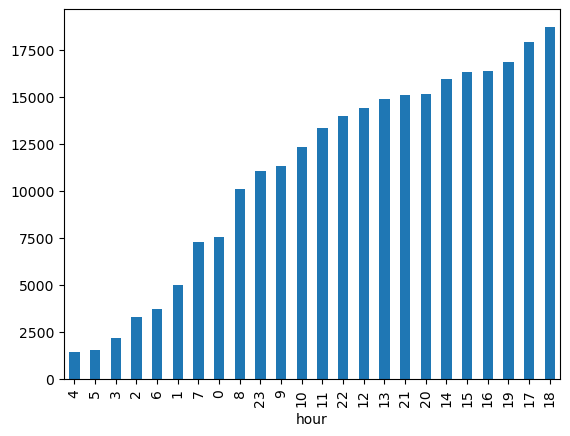

In [308]:
# Visualise the number of trips per hour and find the busiest hour
busiest_hour = df_non_zeros.groupby('hour').size().sort_values(ascending = True)
busiest_hour.plot(kind = 'bar')

print(f"busiest hour is {busiest_hour.index[-1]}")


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [312]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.0075
scaled_hourly_trips = busiest_hour = df_non_zeros.groupby('hour').size() / sample_fraction    # Scaling up the number of trips
pd.options.display.float_format = '{:.0f}'.format
scaled_hourly_trips.sort_values(ascending= False).head(5)

hour
18   2496533
17   2391867
19   2249867
16   2181067
15   2180000
dtype: float64

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend

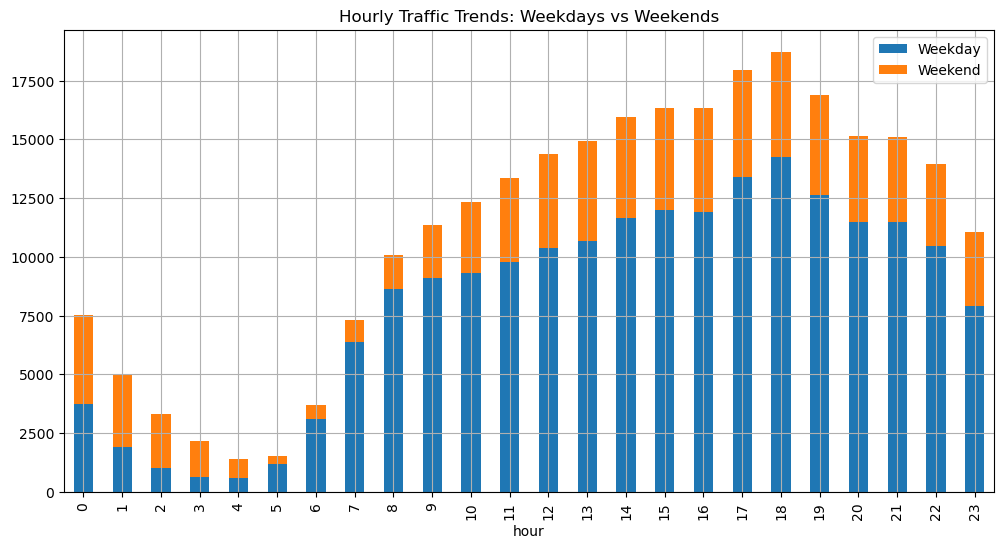

In [315]:
# Compare traffic trends for the week days and weekends

df_non_zeros['is_weekend'] = df_non_zeros['day_of_week'].isin(['Saturday', 'Sunday'])

# Group by hour and is_weekend to get the number of trips
hourly_trips = df_non_zeros.groupby(['hour', 'is_weekend']).size().unstack()

# Plot the traffic trends for weekdays and weekends
plt.figure(figsize=(12, 6))
hourly_trips.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Hourly Traffic Trends: Weekdays vs Weekends')
plt.legend(['Weekday', 'Weekend'])
plt.grid()
plt.show()

In [317]:
#Answer : traffic is less on weekends as the average trip duration is less on weekends compared to weekdays
# and the busiest days are Thursday, Friday and Wednesday
# and the busiest hours are 15, 16, 17, 18, 19
# this will help in planning the resources and also in increasing the revenue by increasing the number of available taxis during the busiest hours and days

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

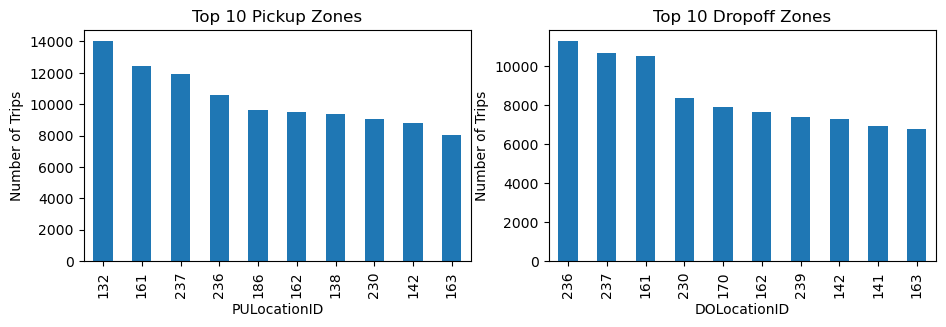

In [320]:
# Find top 10 pickup and dropoff zones
pickupTop10 = df_non_zeros.groupby('PULocationID').size().sort_values(ascending = False).head(10)
dropTop10 = df_non_zeros.groupby('DOLocationID').size().sort_values(ascending = False).head(10)

# Plot the top 10 pickup and dropoff zones
fig, ax = plt.subplots(1,2, figsize = (11,3))
pickupTop10.plot(kind = 'bar', ax = ax[0])
ax[0].set_title('Top 10 Pickup Zones')
ax[0].set_ylabel('Number of Trips')
dropTop10.plot(kind = 'bar', ax = ax[1])
ax[1].set_title('Top 10 Dropoff Zones')
ax[1].set_ylabel('Number of Trips')
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [325]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# calculating pickup and dropoff counts 
pickup_counts = df["PULocationID"].value_counts().reset_index()
pickup_counts.columns = ["LocationID", "pickup_count"]

dropoff_counts = df["DOLocationID"].value_counts().reset_index()
dropoff_counts.columns = ["LocationID", "dropoff_count"]

# Merge with zones
merged_df = zones[["LocationID", "zone", "borough"]].merge(pickup_counts, on="LocationID", how="left")
merged_df = merged_df.merge(dropoff_counts, on="LocationID", how="left")

# Fill NaN values with 0 for zones with no pickups/dropoffs
merged_df["pickup_count"] = merged_df["pickup_count"].fillna(0)
merged_df["dropoff_count"] = merged_df["dropoff_count"].fillna(0)

In [327]:
merged_df.describe()

LocationID  pickup_count  dropoff_count
count         263           263            263
mean          132          1070           1066
std            76          2618           2243
min             1             0              0
25%            66             6             29
50%           132            17             79
75%           198           172            588
max           263         14611          12616

In [329]:
# calculate pickup/dropoff ratio, avoiding division by zero
merged_df["pickup_dropoff_ratio"] = merged_df["pickup_count"] / merged_df["dropoff_count"].replace(0, 1)

In [331]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Get the 10 highest and 10 lowest ratios
top_10_highest = merged_df.nlargest(10, "pickup_dropoff_ratio")[["LocationID", "zone", "borough", "pickup_dropoff_ratio"]]
top_10_lowest = merged_df.nsmallest(10, "pickup_dropoff_ratio")[["LocationID", "zone", "borough", "pickup_dropoff_ratio"]]

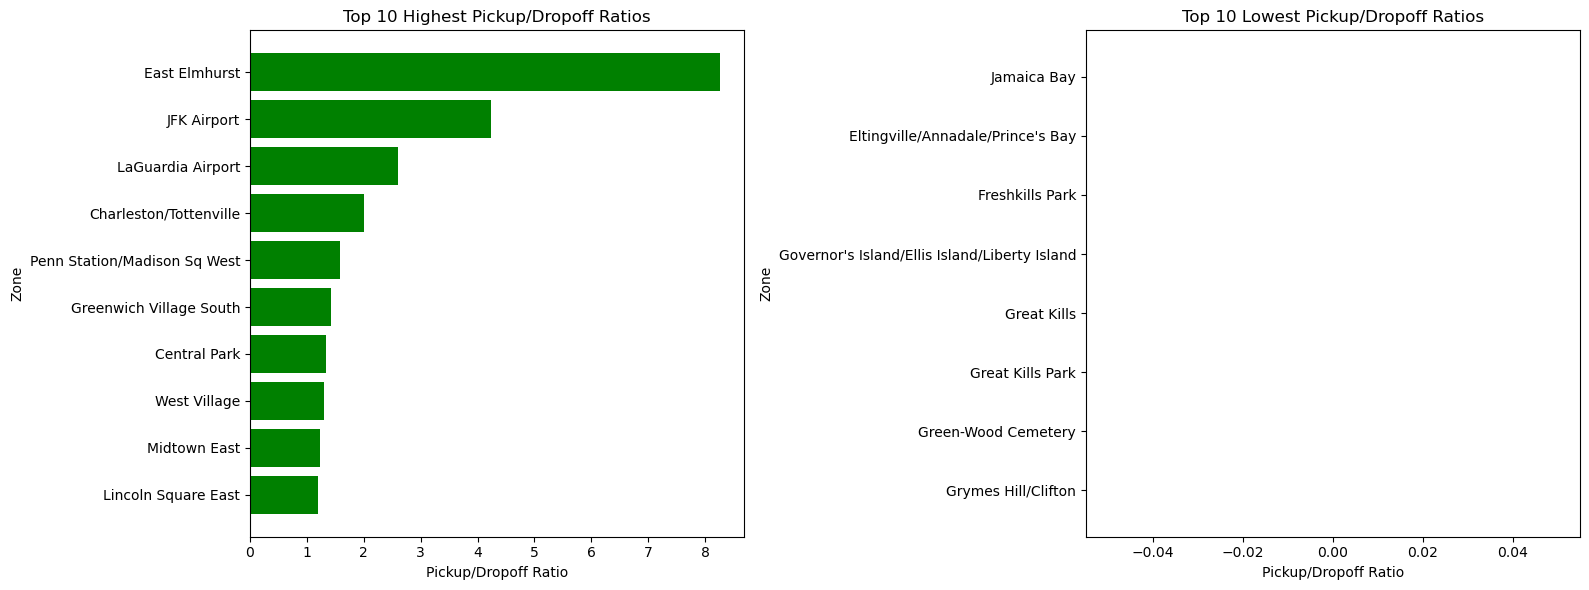

In [333]:
# Plot the top 10 pickup and dropoff zones

fig, ax = plt.subplots(1, 2, figsize= (16, 6), sharex=False)

# Plot top 10 highest pickup/dropoff ratios
ax[0].barh(top_10_highest["zone"], top_10_highest["pickup_dropoff_ratio"], color="green")
ax[0].set_xlabel("Pickup/Dropoff Ratio")
ax[0].set_ylabel("Zone")
ax[0].set_title("Top 10 Highest Pickup/Dropoff Ratios")
ax[0].invert_yaxis()

# Plot top 10 lowest pickup/dropoff ratios
ax[1].barh(top_10_lowest["zone"], top_10_lowest["pickup_dropoff_ratio"], color="red")
ax[1].set_xlabel("Pickup/Dropoff Ratio")
ax[1].set_ylabel("Zone")
ax[1].set_title("Top 10 Lowest Pickup/Dropoff Ratios")
ax[1].invert_yaxis()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [338]:
# Filter trips that occurred between 11 PM and 5 AM
night_hours = df_non_zeros[(df_non_zeros["hour"] >= 23) | (df_non_zeros["hour"] <= 5)]

# Count pickups and dropoffs during night hours
night_pickup_counts = night_hours["PULocationID"].value_counts().reset_index()
night_pickup_counts.columns = ["LocationID", "night_pickup_count"]

night_dropoff_counts = night_hours["DOLocationID"].value_counts().reset_index()
night_dropoff_counts.columns = ["LocationID", "night_dropoff_count"]

# Merge with zone data
night_traffic_df = zones[["LocationID", "zone", "borough"]].merge(night_pickup_counts, on="LocationID", how="left")
night_traffic_df = night_traffic_df.merge(night_dropoff_counts, on="LocationID", how="left")

# Fill NaN values with 0 (for zones with no night pickups/dropoffs)
night_traffic_df["night_pickup_count"] = night_traffic_df["night_pickup_count"].fillna(0)
night_traffic_df["night_dropoff_count"] = night_traffic_df["night_dropoff_count"].fillna(0)

# calculate total night traffic (sum of pickups and dropoffs)
night_traffic_df["total_night_traffic"] = night_traffic_df["night_pickup_count"] + night_traffic_df["night_dropoff_count"]

# Get top 10 zones with highest night traffic
top_10_night_zones = night_traffic_df.nlargest(10, "total_night_traffic")[["LocationID", "zone", "borough", "total_night_traffic"]]

top_10_night_zones

LocationID                          zone    borough  total_night_traffic
219          79                  East Village  Manhattan                 3434
216         249                  West Village  Manhattan                 2603
221          48                  Clinton East  Manhattan                 2401
234         132                   JFK Airport     Queens                 2359
199         148               Lower East Side  Manhattan                 2077
227         230     Times Sq/Theatre District  Manhattan                 1918
220          68                  East Chelsea  Manhattan                 1696
204         114       Greenwich Village South  Manhattan                 1672
215         107                      Gramercy  Manhattan                 1648
230         186  Penn Station/Madison Sq West  Manhattan                 1580

In [340]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_trips = df_non_zeros[(df_non_zeros['hour'] > 23) | (df_non_zeros['hour'] <=5)]

# get the traffic for night pickup
pickup_traffic = night_trips['PULocationID'].value_counts().reset_index()
pickup_traffic.columns = ['LocationID','Pickup_count']

#get the traffic for night drops
drop_traffic = night_trips['DOLocationID'].value_counts().reset_index()
drop_traffic.columns = ['LocationID','Drop_count']
#merge with zone dataset
night_traffic_df = zones[['LocationID','zone','borough']].merge(pickup_traffic, on = 'LocationID' , how = 'left')
night_traffic_df = night_traffic_df.merge(drop_traffic, on = 'LocationID', how = 'left')
#fill nan with 0 to avoid miscalculations
night_traffic_df['Pickup_count'] = night_traffic_df['Pickup_count'].fillna(0)
night_traffic_df['Drop_count'] = night_traffic_df['Drop_count'].fillna(0)

top10P = night_traffic_df.nlargest(10, 'Pickup_count')[['LocationID','zone','Pickup_count']]
top10d = night_traffic_df.nlargest(10,'Drop_count')[['LocationID','zone','Drop_count']]

print("top 10 pickup zones\n",top10P, "\n")
print("Top 10 Drop zones \n", top10d)


top 10 pickup zones
      LocationID                          zone  Pickup_count
219          79                  East Village          1843
216         249                  West Village          1343
234         132                   JFK Airport          1240
199         148               Lower East Side          1176
221          48                  Clinton East          1015
204         114       Greenwich Village South           950
227         230     Times Sq/Theatre District           737
230         186  Penn Station/Madison Sq West           618
218         164                 Midtown South           605
220          68                  East Chelsea           575 

Top 10 Drop zones 
      LocationID                       zone  Drop_count
219          79               East Village         774
221          48               Clinton East         647
224         170                Murray Hill         616
215         107                   Gramercy         567
220          68       

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [345]:
# Filter for night hours (11 PM to 5 AM)
night_trips = df_non_zeros[(df_non_zeros['hour'] > 23) | (df_non_zeros['hour'] <=5)]
day_time  = df_non_zeros[(df_non_zeros['hour'] < 23) | (df_non_zeros['hour'] >5)]

print("Night time Revenue = ",night_trips.total_amount.sum())
print("Day time revenue share = ", day_time.total_amount.sum())


Night time Revenue =  613507.6699999999
Day time revenue share =  7824913.49


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

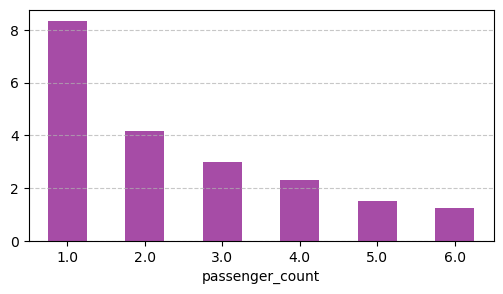

In [348]:
# Analyse the fare per mile per passenger for different passenger counts

df_non_zeros['fare_per_mile'] = df_non_zeros['fare_amount']/df_non_zeros["trip_distance"]
df_non_zeros['fare_per_mile_per_passenger'] = df_non_zeros['fare_per_mile']/df_non_zeros["passenger_count"]
result = df_non_zeros.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()

# Plot the results
plt.figure(figsize=(6, 3))
result.plot(kind="bar", color="purple", alpha=0.7)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

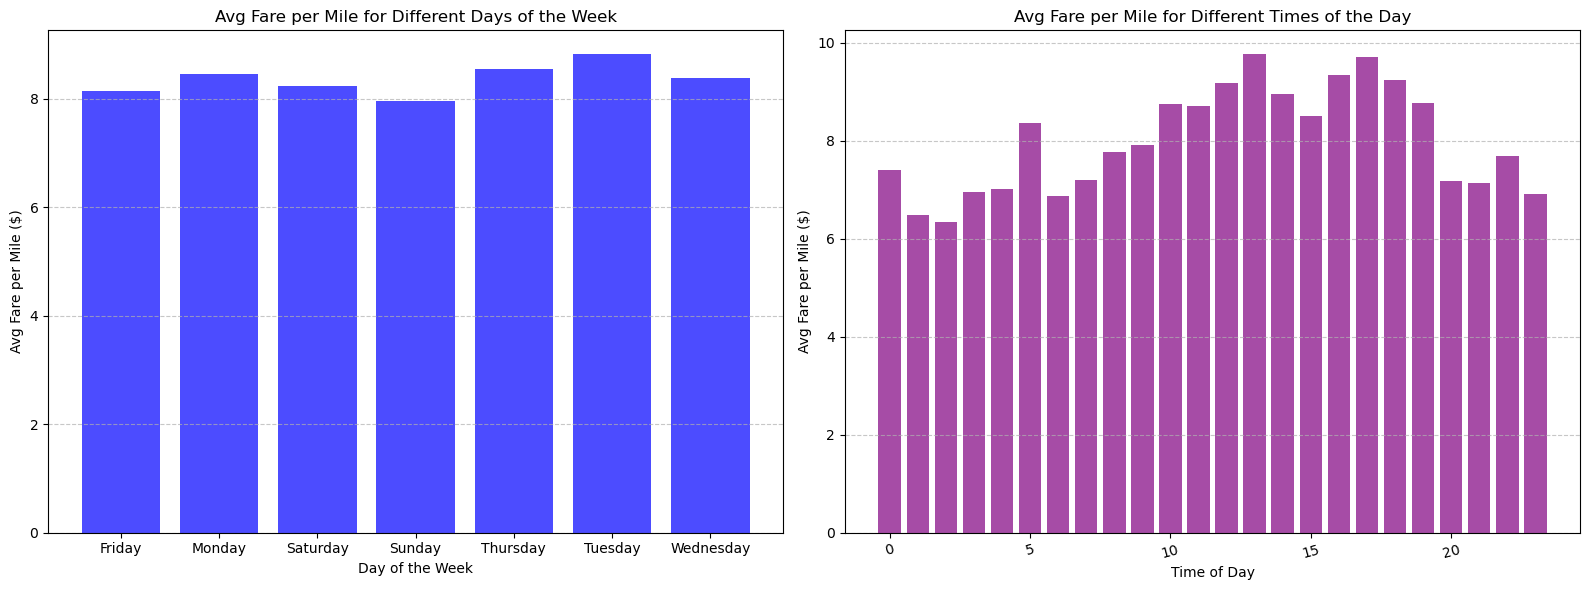

In [354]:
# Compare the average fare per mile for different days and for different times of the day

by_days = df_non_zeros.groupby('day_of_week')['fare_per_mile'].mean().sort_index()
by_hour = df_non_zeros.groupby('hour')['fare_per_mile'].mean().sort_index()


fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart for days of the week
ax[0].bar(by_days.index, by_days.values, color="blue", alpha=0.7)
ax[0].set_xlabel("Day of the Week")
ax[0].set_ylabel("Avg Fare per Mile ($)")
ax[0].set_title("Avg Fare per Mile for Different Days of the Week")
ax[0].grid(axis="y", linestyle="--", alpha=0.7)

# Bar chart for hour of the day
ax[1].bar(by_hour.index, by_hour.values, color="purple", alpha=0.7)
ax[1].set_xlabel("Time of Day")
ax[1].set_ylabel("Avg Fare per Mile ($)")
ax[1].set_title("Avg Fare per Mile for Different Times of the Day")
ax[1].grid(axis="y", linestyle="--", alpha=0.7)

plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

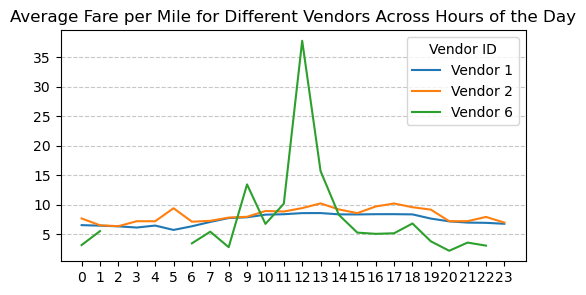

hour      0   1   2   3   4   5   6   7   8   9   ...  14  15  16  17  18  19  \
VendorID                                          ...                           
1          7   6   6   6   6   6   6   7   8   8  ...   8   8   8   8   8   8   
2          8   7   6   7   7   9   7   7   8   8  ...   9   9  10  10  10   9   
6          3   6 NaN NaN NaN NaN   3   5   3  13  ...   8   5   5   5   7   4   

hour      20  21  22  23  
VendorID                  
1          7   7   7   7  
2          7   7   8   7  
6          2   4   3 NaN  

[3 rows x 24 columns]


In [356]:
# Compare fare per mile for different vendors

fare_per_mile_by_vendor_hour = df_non_zeros.groupby(['VendorID','hour'])['fare_per_mile'].mean().unstack()

# Plot the results
plt.figure(figsize=(6, 3))

for vendor in fare_per_mile_by_vendor_hour.index:
    plt.plot(fare_per_mile_by_vendor_hour.columns, fare_per_mile_by_vendor_hour.loc[vendor], label=f"Vendor {vendor}")

plt.title("Average Fare per Mile for Different Vendors Across Hours of the Day")
plt.xticks(range(0, 24))
plt.legend(title="Vendor ID")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

print(fare_per_mile_by_vendor_hour)

In [363]:
##vendor 6 has highest fare per mile specially during afternoon (12,13,14)

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.

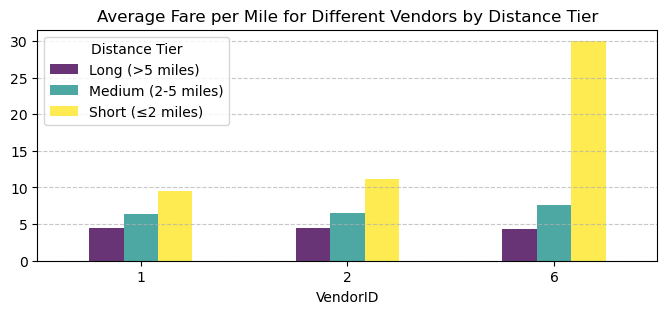

In [366]:
# Defining distance tiers

def categorize_distance(distance):
    if distance <= 2:
        return "Short (≤2 miles)"
    elif 2 < distance <= 5:
        return "Medium (2-5 miles)"
    else:
        return "Long (>5 miles)"

# Apply distance categories
df_non_zeros["distance_tier"] = df_non_zeros["trip_distance"].apply(categorize_distance)

# get average fare per mile for each vendor in each tier
fare_per_mile_by_vendor_tier = df_non_zeros.groupby(["VendorID", "distance_tier"])["fare_per_mile"].mean().unstack()

# Plot the results
fare_per_mile_by_vendor_tier.plot(kind="bar", figsize=(8, 3), colormap="viridis", alpha=0.8)

plt.title("Average Fare per Mile for Different Vendors by Distance Tier")
plt.xticks(rotation=0)
plt.legend(title="Distance Tier")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

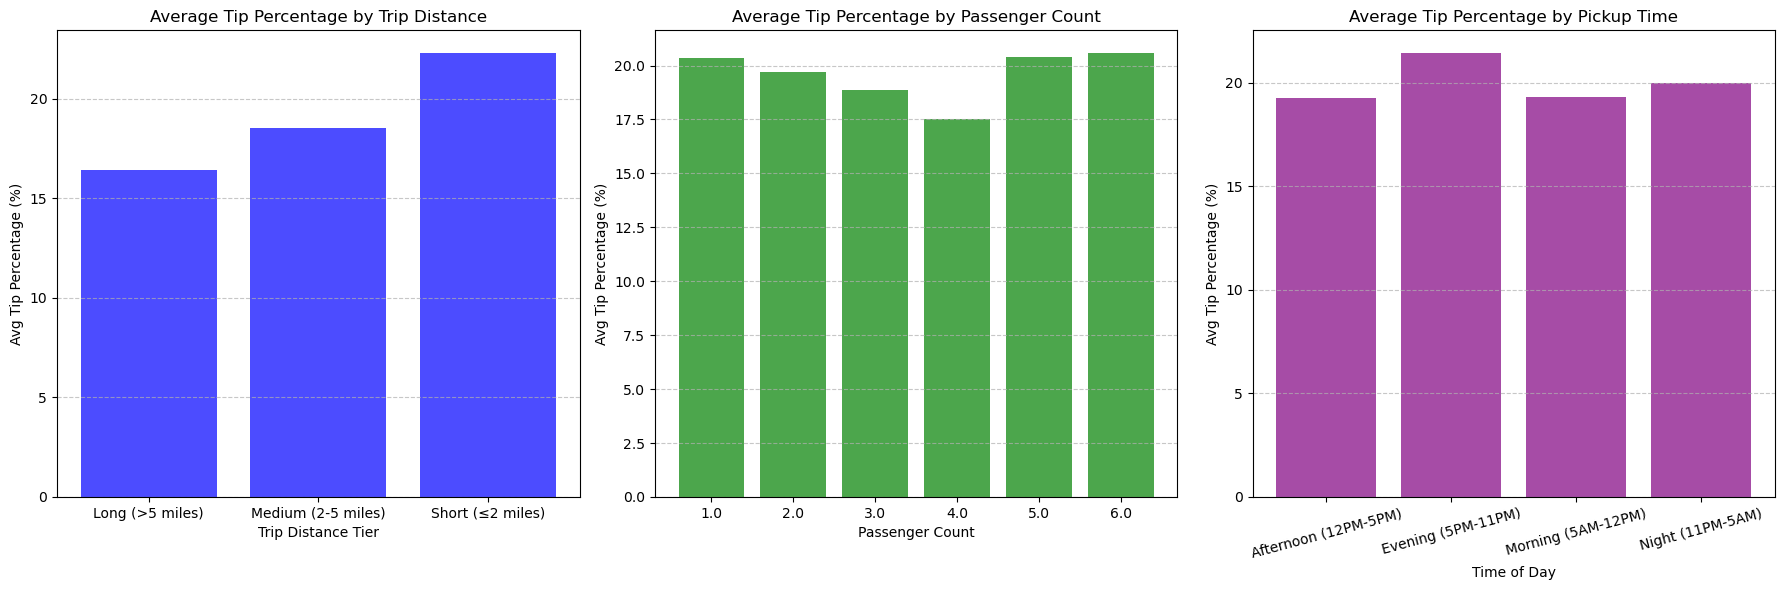

In [370]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

def categorize_time(hour):
    if 5 <= hour < 12:
        return "Morning (5AM-12PM)"
    elif 12 <= hour < 17:
        return "Afternoon (12PM-5PM)"
    elif 17 <= hour < 23:
        return "Evening (5PM-11PM)"
    else:
        return "Night (11PM-5AM)"


# calculate tip percentage
df_non_zeros["tip_percentage"] = (df_non_zeros["tip_amount"] / df_non_zeros["fare_amount"]) * 100

# Categorize pickup times
df_non_zeros["time_of_day"] = df_non_zeros["hour"].apply(categorize_time)

tip_by_distance = df_non_zeros.groupby("distance_tier")["tip_percentage"].mean()

tip_by_passenger = df_non_zeros.groupby("passenger_count")["tip_percentage"].mean()

tip_by_time = df_non_zeros.groupby("time_of_day")["tip_percentage"].mean()

# Plot tip percentage trends
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Tip % by Distance
ax[0].bar(tip_by_distance.index, tip_by_distance.values, color="blue", alpha=0.7)
ax[0].set_xlabel("Trip Distance Tier")
ax[0].set_ylabel("Avg Tip Percentage (%)")
ax[0].set_title("Average Tip Percentage by Trip Distance")
ax[0].grid(axis="y", linestyle="--", alpha=0.7)

# Tip % by Passenger Count
ax[1].bar(tip_by_passenger.index.astype(str), tip_by_passenger.values, color="green", alpha=0.7)
ax[1].set_xlabel("Passenger Count")
ax[1].set_ylabel("Avg Tip Percentage (%)")
ax[1].set_title("Average Tip Percentage by Passenger Count")
ax[1].grid(axis="y", linestyle="--", alpha=0.7)

# Tip % by Time of Day
ax[2].bar(tip_by_time.index, tip_by_time.values, color="purple", alpha=0.7)
ax[2].set_xlabel("Time of Day")
ax[2].set_ylabel("Avg Tip Percentage (%)")
ax[2].set_title("Average Tip Percentage by Pickup Time")
ax[2].grid(axis="y", linestyle="--", alpha=0.7)

plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

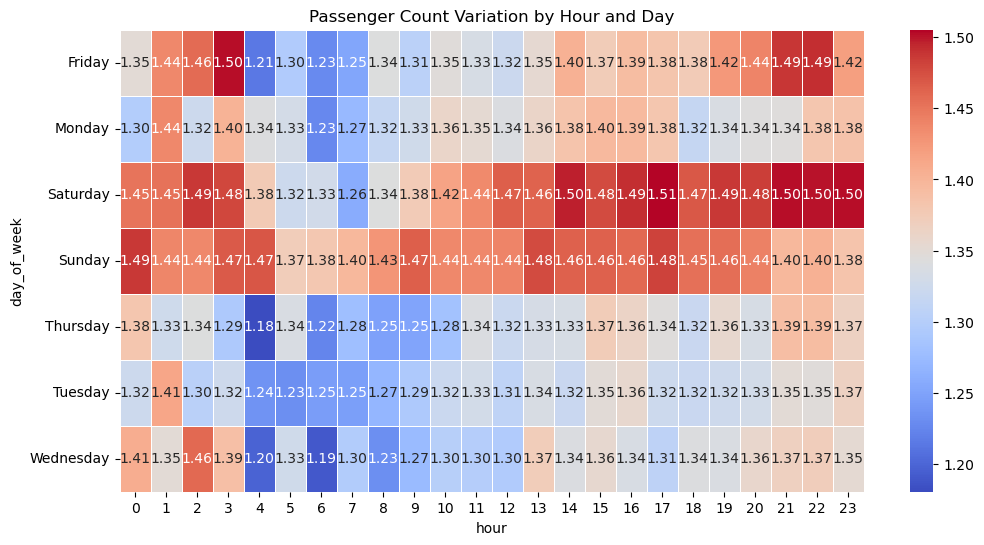

In [376]:
# See how passenger count varies across hours and days

passenger_by_hour = df.groupby("hour")["passenger_count"].mean()

passenger_by_day = df.groupby("day_of_week")["passenger_count"].mean()

# Create a pivot table for heatmap (hour vs. day)
heatmap_data = df.pivot_table(values="passenger_count", index="day_of_week", columns="hour", aggfunc="mean")

# Plot heatmap for hour vs. day trends
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Passenger Count Variation by Hour and Day")
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [378]:
# How does passenger count vary across zones

passenger_count_by_zone = df_non_zeros.groupby('zone')['passenger_count'].sum()


pickup_passenger_counts = df_non_zeros.groupby("PULocationID")["passenger_count"].sum().reset_index()
pickup_passenger_counts.columns = ["LocationID", "pickup_passengers"]

dropoff_passenger_counts = df_non_zeros.groupby("DOLocationID")["passenger_count"].sum().reset_index()
dropoff_passenger_counts.columns = ["LocationID", "dropoff_passengers"]

# Merge with zone data
zone_passenger_counts = zones[["LocationID", "zone", "borough"]].merge(pickup_passenger_counts, on="LocationID", how="left")
zone_passenger_counts = zone_passenger_counts.merge(dropoff_passenger_counts, on="LocationID", how="left")

# Compute total passengers per zone
zone_passenger_counts["total_passengers"] = zone_passenger_counts["pickup_passengers"] + zone_passenger_counts["dropoff_passengers"]

# Get top 10 highest and lowest zones
top_10_zones = zone_passenger_counts.nlargest(10, "total_passengers")[["zone", "borough", "total_passengers"]]
bottom_10_zones = zone_passenger_counts.nsmallest(10, "total_passengers")[["zone", "borough", "total_passengers"]]

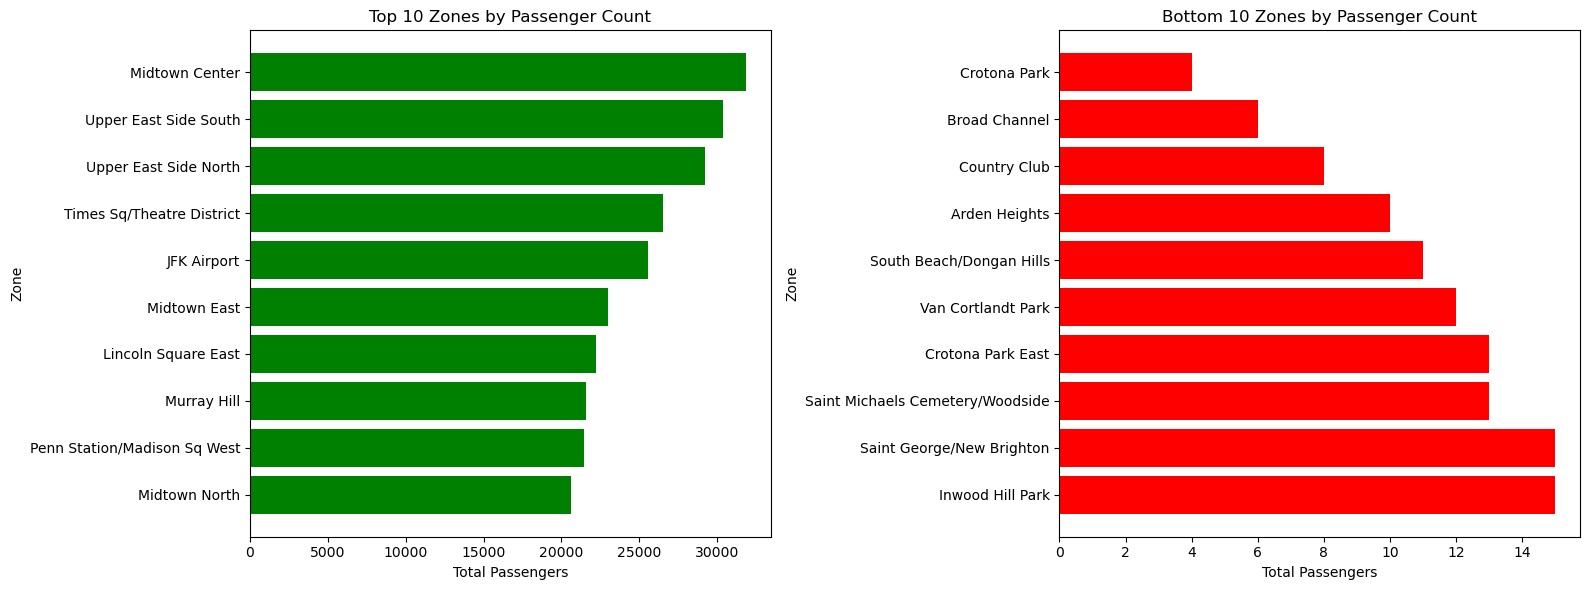

In [382]:
# Plot the top and bottom 10 zones
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Top 10 zones
ax[0].barh(top_10_zones["zone"], top_10_zones["total_passengers"], color="green")
ax[0].set_xlabel("Total Passengers")
ax[0].set_ylabel("Zone")
ax[0].set_title("Top 10 Zones by Passenger Count")
ax[0].invert_yaxis()  # Show highest at top

# Bottom 10 zones
ax[1].barh(bottom_10_zones["zone"], bottom_10_zones["total_passengers"], color="red")
ax[1].set_xlabel("Total Passengers")
ax[1].set_ylabel("Zone")
ax[1].set_title("Bottom 10 Zones by Passenger Count")
ax[1].invert_yaxis()  # Show lowest at top

plt.tight_layout()
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [386]:
surcharge_columns = ['mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee']

# Calculate the frequency of extra charges for each pickup and dropoff zone
pickup_surcharge_counts = df_non_zeros.groupby('PULocationID')[surcharge_columns].apply(lambda x: (x > 0).sum()).reset_index()
dropoff_surcharge_counts = df_non_zeros.groupby('DOLocationID')[surcharge_columns].apply(lambda x: (x > 0).sum()).reset_index()

# Merge with zone data to get zone names
pickup_surcharge_counts = pickup_surcharge_counts.merge(zones[['LocationID', 'zone', 'borough']], left_on='PULocationID', right_on='LocationID', how='left')
dropoff_surcharge_counts = dropoff_surcharge_counts.merge(zones[['LocationID', 'zone', 'borough']], left_on='DOLocationID', right_on='LocationID', how='left')

# Calculate the frequency of extra charges by hour of the day
hourly_surcharge_counts = df_non_zeros.groupby('hour')[surcharge_columns].apply(lambda x: (x > 0).sum()).reset_index()

# Filter to show only the top 10 zones with the highest frequency of extra charges
top_pickup_surcharge_counts = pickup_surcharge_counts.nlargest(10, surcharge_columns[0])
top_dropoff_surcharge_counts = dropoff_surcharge_counts.nlargest(10, surcharge_columns[0])
top_hourly_surcharge_counts = hourly_surcharge_counts.nlargest(10, surcharge_columns[0])
surcharge_columns = ['mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee']

# Calculate the frequency of extra charges for each pickup and dropoff zone
pickup_surcharge_counts = df_non_zeros.groupby('PULocationID')[surcharge_columns].apply(lambda x: (x > 0).sum()).reset_index()
dropoff_surcharge_counts = df_non_zeros.groupby('DOLocationID')[surcharge_columns].apply(lambda x: (x > 0).sum()).reset_index()

# Merge with zone data to get zone names
pickup_surcharge_counts = pickup_surcharge_counts.merge(zones[['LocationID', 'zone', 'borough']], left_on='PULocationID', right_on='LocationID', how='left')
dropoff_surcharge_counts = dropoff_surcharge_counts.merge(zones[['LocationID', 'zone', 'borough']], left_on='DOLocationID', right_on='LocationID', how='left')

# Calculate the frequency of extra charges by hour of the day
hourly_surcharge_counts = df_non_zeros.groupby('hour')[surcharge_columns].apply(lambda x: (x > 0).sum()).reset_index()

# Filter to show only the top 10 zones with the highest frequency of extra charges
top_pickup_surcharge_counts = pickup_surcharge_counts.nlargest(10, surcharge_columns[0])
top_dropoff_surcharge_counts = dropoff_surcharge_counts.nlargest(10, surcharge_columns[0])
top_hourly_surcharge_counts = hourly_surcharge_counts.nlargest(10, surcharge_columns[0])





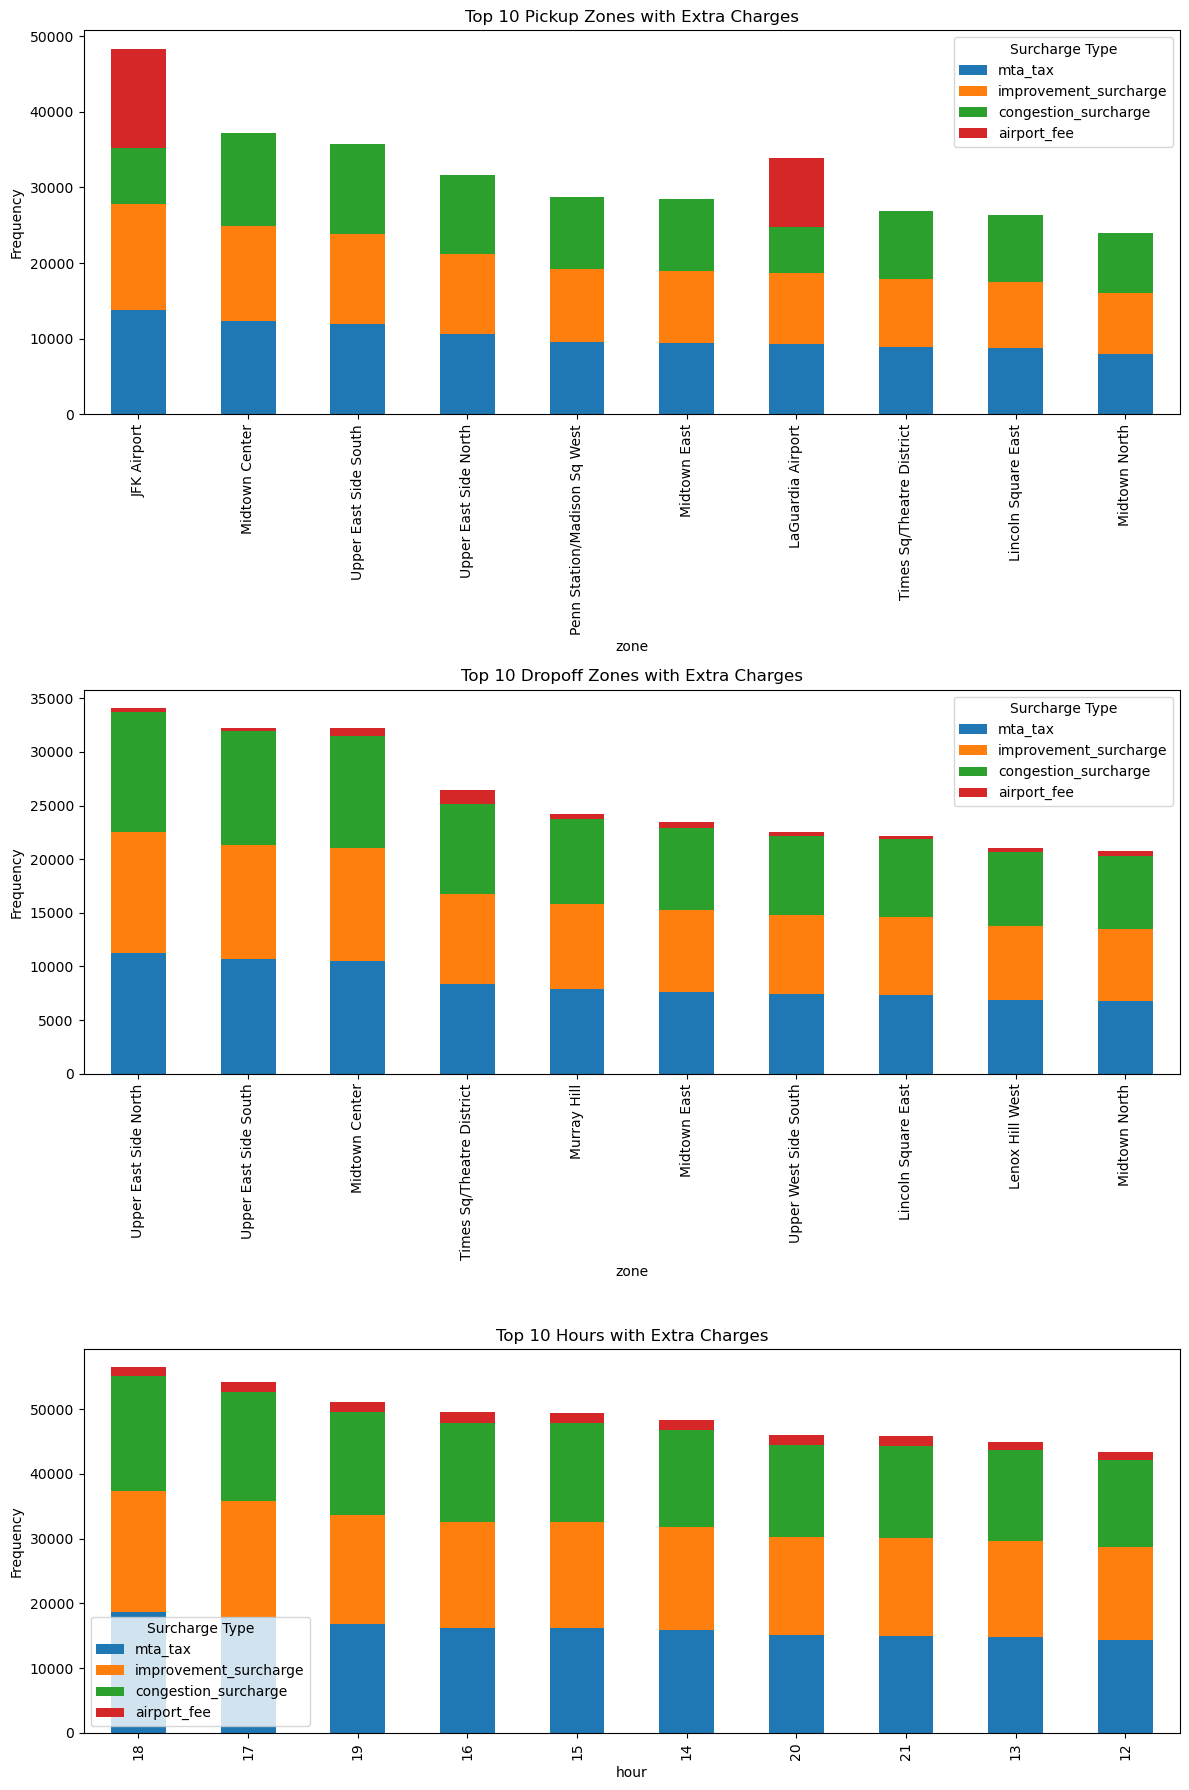

In [388]:

# Plot the results
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# Plot pickup zones with extra charges
top_pickup_surcharge_counts.set_index('zone')[surcharge_columns].plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_title('Top 10 Pickup Zones with Extra Charges')
ax[0].set_ylabel('Frequency')
ax[0].legend(title='Surcharge Type')

# Plot dropoff zones with extra charges
top_dropoff_surcharge_counts.set_index('zone')[surcharge_columns].plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_title('Top 10 Dropoff Zones with Extra Charges')
ax[1].set_ylabel('Frequency')
ax[1].legend(title='Surcharge Type')

# Plot hourly frequency of extra charges
top_hourly_surcharge_counts.set_index('hour')[surcharge_columns].plot(kind='bar', stacked=True, ax=ax[2])
ax[2].set_title('Top 10 Hours with Extra Charges')
ax[2].set_ylabel('Frequency')
ax[2].legend(title='Surcharge Type')

plt.tight_layout()
plt.show()

In [390]:
# How often is each surcharge applied?

# Defining surcharge columns
surcharge_columns = ["mta_tax", "improvement_surcharge", "congestion_surcharge", "airport_fee"]

# Count the number of trips where each surcharge is applied
surcharge_counts = {col: (df[col] > 0).sum() for col in surcharge_columns}

# calculating percentage of trips affected by each surcharge
total_trips = len(df)
surcharge_percentages = {col: (count / total_trips) * 100 for col, count in surcharge_counts.items()}

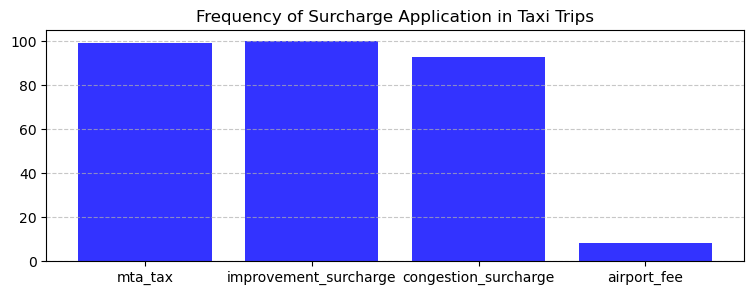

In [392]:

# Plot the surcharge application frequency
plt.figure(figsize=(9, 3))
plt.bar(surcharge_percentages.keys(), surcharge_percentages.values(), color="blue", alpha=0.8)
plt.title("Frequency of Surcharge Application in Taxi Trips")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

<b>1️ Increase Taxi Availability in High-Demand Zones:</b>
Deploy more taxis in Midtown, Times Square, and Airports, especially during evening (5PM-11PM) and weekends.

<b>2️ Reduce Idle Time in Low-Demand Areas:</b>
Limit taxis in Staten Island parks, Rikers Island, and cemeteries, which see almost no rides.

<b>3️ Use Data-Driven Route Optimization:</b>
Suggest alternate routes to drivers based on traffic conditions, congestion surcharges, and passenger hotspots.

<b>4️- Improve Nighttime Dispatching:</b>
Demand peaks between 11PM-5AM, so dispatch more drivers during these hours to match ride requests.

<b>5️- Prioritize Airport Pickups with Targeted Supply:</b>
Since only 8.46% of trips are airport rides, encourage more pickups at JFK & LaGuardia with optimized dispatching and promotions.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

#### **Strategic Positioning of Cabs Based on Trip Trends**

##### **1. Peak Hour Allocation**
- Deploy more cabs in **business districts**, **transportation hubs**, and **entertainment areas** during:
  - **Morning & evening rush hours** (7–9 AM and 5–8 PM).
  - **Late-night rides** peak during weekends (10 PM–2 AM) in nightlife zones.

##### **2. Time-of-Day Optimization**
- **Early Morning (4–7 AM):** Position cabs near **airports and railway stations** for travelers.
- **Midday (10 AM–3 PM):** Focus on **residential areas, shopping malls, and medical centers**.
- **Night (10 PM–2 AM):** Increase coverage in **entertainment districts**.

##### **3. Day-of-Week Strategy**
- **Weekdays:** Prioritize **corporate hubs, office districts, and public transit nodes**.
- **Weekends:** Focus on **tourist hotspots, shopping centers, and event venues**.

##### **4. Seasonal Demand Adjustments**
- **Winter Months:** Deploy cabs near **hotels, tourist destinations, and transport hubs**.
- **Summer Months:** Station taxis in **recreational spots, beaches, and amusement parks**.

##### **5. Special Events & Surge Handling**
- Monitor **major events (sports, concerts, festivals)** to pre-position cabs strategically.
- Utilize **real-time tracking** for dynamic repositioning.

##### **6. Geo-Zone Optimization**
- Use **heatmaps** to segment the city into **high, medium, and low-demand zones**.
- Deploy more cabs in **high-demand zones** while balancing service in lower-density areas.

##### **7. AI & Data-Driven Dispatch**
- Implement **machine learning models** to predict **demand** and position cabs efficiently.
- Use **dynamic pricing** and **real-time route optimization** for higher profitability.






**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

### **Data-Driven Adjustments to Pricing Strategy**

##### **1. Dynamic Pricing Model**
- Implement **surge pricing** during peak demand periods (rush hours, late nights, and special events).
- Adjust fares based on **real-time demand** and competitor pricing.

##### **2. Time-Based Pricing Optimization**
- **Rush Hours (7–9 AM, 5–8 PM):** Increase fares by **10–20%** due to high demand.
- **Off-Peak Hours (10 AM–4 PM):** Offer **discounted fares** to encourage bookings.
- **Late Night (10 PM–2 AM):** Apply **premium pricing** due to lower cab availability.

##### **3. Zone-Based Fare Adjustments**
- **Business Hubs:** Charge higher fares due to demand and shorter trip distances.
- **Residential Areas:** Offer **lower base fares** to encourage local travel.
- **Tourist Hotspots:** Increase fares during holiday seasons.

##### **4. Personalized Pricing Strategies**
- Offer **loyalty discounts** to frequent riders.
- Implement **subscription-based pricing** for corporate clients.

##### **5. Competitor Analysis & Real-Time Adjustments**
- Continuously monitor **competitor pricing** using AI-driven analysis.
- Adjust fares to remain competitive while maximizing revenue.

##### **6. Seasonal & Event-Based Surge Pricing**
- **Festivals & concerts:** Increase fares near event venues.
- **Weather conditions:** Adjust fares during extreme weather when demand spikes.

##### **7. AI-Driven Revenue Optimization**
- Use machine learning to **predict demand fluctuations** and optimize fares.
- Ensure pricing stays **profitable yet competitive** across different ride zones.

---

### **Conclusion**
These **data-driven pricing adjustments** will help optimize revenue while ensuring affordability, keeping the service competitive, and enhancing rider experience. 


